In [1]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')

In [2]:
%load_ext autoreload
%autoreload 2
#import CCPA_lib as cp
import sorf_lib as sf

In [3]:
oorder = ['Intergenic', 'Antisense', 'Out of Frame','In Frame',  'Annotated', ]
opalette = sns.color_palette("rainbow", 5).as_hex()
#del opalette[4]
soorder = [oorder[0], oorder[4]]
sopalette = [opalette[0], opalette[4]]
sopaletted = ['#04347b','#802800']

In [4]:
sns.set_context('talk')
sns.set_style('white')


![](http://oregonstate.edu/instruct/bb450/fall14/stryer7/2/table_02_02.jpg)

https://www.uniprot.org/uniprot/Q7V735

http://tigrfams.jcvi.org/cgi-bin/HmmReportPage.cgi?acc=TIGR03798

https://www.ebi.ac.uk/training/online/course/interpro-functional-and-structural-analysis-protei/sequence-searching/searching-interpro-batc

http://www.ebi.ac.uk/interpro/sequencesearch/iprscan5-S20190707-131508-0462-76111813-p1m

https://www.ebi.ac.uk/Tools/services/rest/iprscan5/result/iprscan5-S20190707-131508-0462-76111813-p1m/json

In [5]:
oorder = ['Intergenic', 'Antisense', 'Out of Frame','In Frame',  'Annotated', ]
opalette = sns.color_palette("rainbow", 5).as_hex()
#del opalette[4]
genome='MIT9313'

In [6]:
found_sorf_df = pd.read_pickle('found_sorf_ISME16_David.pkl.gz')

In [7]:
found_sorf_df.shape

(213, 76)

# Gene Families

In [8]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(found_sorf_df['product'].value_counts())

hypothetical protein                                                  88
Nif11-like leader peptide family natural product precursor            23
                                                                      12
high light inducible protein                                           5
4a-hydroxytetrahydrobiopterin dehydratase                              2
bacteriocin                                                            2
DUF4278 domain-containing protein                                      2
lantipeptide                                                           1
50S ribosomal protein L31                                              1
rubredoxin                                                             1
30S ribosomal protein S15                                              1
HU family DNA-binding protein                                          1
YlxR family protein                                                    1
photosystem II reaction center protein PsbH        

In [9]:
family_interaction = ['ProcA', 'CCRG-2', 'CCRG-1']
metabolism_products = [
    '2Fe-2S iron-sulfur cluster binding domain-containing protein',
    '4a-hydroxytetrahydrobiopterin dehydratase',
    'ATP synthase F0 subunit C',
       'NAD(P)H-quinone oxidoreductase subunit O',
    'glutaredoxin 3',
       'phosphoribosylformylglycinamidine synthase subunit PurS',
    'rubredoxin',
       'sulfur carrier protein ThiS',
       'sulfurtransferase TusA family protein',
]
translation_products = [
    'translation initiation factor IF-1',
       'Asp-tRNA(Asn)/Glu-tRNA(Gln) amidotransferase subunit GatC',    
]
nucleotide_products = [
       'BolA family transcriptional regulator',
       'CopG family transcriptional regulator',
       'response regulator transcription factor',
        'HU family DNA-binding protein',
        'DNA-directed RNA polymerase subunit omega',
       'RNA recognition motif-containing protein',
    'RNA-binding S4 domain-containing protein', 
        'YciI family protein',
]
interaction_products = [
    'bacteriocin',    
]
light_products = [
    'ssl1498 family light-harvesting-like protein',
     'ssl1498 family light-harvesting-like protein',
       'chlororespiratory reduction protein 7',
       'cytochrome b559 subunit beta', 
       'cytochrome b559 subunit alpha'
]

found_sorf_df['family2'] = found_sorf_df['family']

found_sorf_df.loc[found_sorf_df['product'].str.contains('ribosomal'), 'family2'] = 'Translation'
found_sorf_df.loc[found_sorf_df['product'].str.contains('photosystem'), 'family2'] = 'Photosynthesis & Light'
found_sorf_df.loc[found_sorf_df['product'].str.contains('hypothetical'), 'family2'] = 'Hypothetical'
found_sorf_df.loc[found_sorf_df['product'] == '', 'family2'] = 'N/A'
found_sorf_df.loc[found_sorf_df['product'].str.contains('domain-containing protein') &
                  found_sorf_df['product'].str.startswith('DUF') , 'family2'] = 'Hypothetical'
found_sorf_df.loc[found_sorf_df['product'].str.contains('family protein') &
                  found_sorf_df['product'].str.startswith('DUF') , 'family2'] = 'Hypothetical'
found_sorf_df.loc[found_sorf_df['product'].str.contains('high light inducible protein'), 'family2'] = 'Photosynthesis & Light'
found_sorf_df.loc[found_sorf_df['product'].str.contains('carboxysome'), 'family2'] = 'Photosynthesis & Light'

found_sorf_df.loc[found_sorf_df['product'].isin(light_products), 'family2'] = 'Photosynthesis & Light'
found_sorf_df.loc[found_sorf_df['product'].isin(interaction_products), 'family2'] = 'Interactions'
found_sorf_df.loc[found_sorf_df['product'].isin(metabolism_products), 'family2'] = 'Metabolism'
found_sorf_df.loc[found_sorf_df['product'].isin(translation_products), 'family2'] = 'Translation'
found_sorf_df.loc[found_sorf_df['product'].isin(nucleotide_products), 'family2'] = 'Nucleotide binding'


found_sorf_df.loc[found_sorf_df['family'].isin(family_interaction), 'family2'] = 'Interactions'
found_sorf_df.loc[found_sorf_df['family2'].isna(), 'family2'] = 'Other'





In [10]:
found_sorf_df.family.unique()

array([nan, 'ProcA', 'CCRG-2', 'CCRG-1'], dtype=object)

In [11]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', 100000):  # more options can be specified also
    #display(found_sorf_df.loc[found_sorf_df.family2.isna(), 'product'].value_counts())    
    display(found_sorf_df.loc[found_sorf_df.family2.isna(), 'product'].sort_values().reset_index(drop=True))

Series([], Name: product, dtype: object)

In [12]:
found_sorf_df.groupby(['family2'])['product'].value_counts()

family2       product                                                  
Hypothetical  hypothetical protein                                         86
              DUF4278 domain-containing protein                             2
              DUF1816 domain-containing protein                             1
              DUF2079 domain-containing protein                             1
              DUF2470 domain-containing protein                             1
                                                                           ..
Translation   50S ribosomal protein L33                                     1
              50S ribosomal protein L35                                     1
              50S ribosomal protein L36                                     1
              Asp-tRNA(Asn)/Glu-tRNA(Gln) amidotransferase subunit GatC     1
              translation initiation factor IF-1                            1
Name: product, Length: 87, dtype: int64

In [13]:
found_sorf_df.loc[found_sorf_df['family2'] == 'Other']['product'].value_counts().index.unique()

Index(['PipX family protein', 'ATP-dependent Clp protease adapter ClpS',
       'BMC domain-containing protein', 'NifU family protein',
       'Nif11 family protein', 'cupin domain-containing protein',
       'chemotaxis protein', 'CbiX/SirB N-terminal domain-containing protein',
       'acyl carrier protein', 'YlxR family protein',
       'guanylate-binding protein',
       'UDP-2,4-diacetamido-2,4, 6-trideoxy-beta-L-altropyranose hydrolase'],
      dtype='object')

# BLAST vs SORFS

In [14]:
def is_in_found_sorf(r):
    orfid = r.id.replace('lcl|','')
    return found_sorf_df.orfid.isin([orfid]).sum() > 0
    

In [15]:
accession = sf.get_accession(genome)
orf_dpath = 'orffinder_tmp'
orf_fpath = os.path.join(orf_dpath, f'{accession}.orffinder.fa')

In [16]:
found_sorf_df.aaseq.isna().sum()

0

In [17]:
from Bio import SeqIO
records = (r for r in SeqIO.parse(orf_fpath, "fasta") if is_in_found_sorf(r))

In [18]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Alphabet import IUPAC
def _create_rec(orfid, aaseq):
    record = SeqRecord(Seq(aaseq, IUPAC.protein), id=orfid, description='unnamed protein product')
    return record
records = [
    _create_rec(orfid, aaseq) for (orfid, aaseq)
    in zip(found_sorf_df['orfid'],found_sorf_df['aaseq'])
]


In [19]:
out_fpath = os.path.join(orf_dpath, f'{genome}_found_proteome.fasta')
count = SeqIO.write(records, out_fpath, "fasta")
print("Saved %i records from %s to %s" % (count, orf_fpath, out_fpath))

Saved 213 records from orffinder_tmp\BX548175.orffinder.fa to orffinder_tmp\MIT9313_found_proteome.fasta


 mit9313_found_vs_pro_syn    https://blast.ncbi.nlm.nih.gov/Blast.cgi?CMD=Get&RID=8P2ACMPV014    
 mit9313_found_vs_nr         https://blast.ncbi.nlm.nih.gov/Blast.cgi?CMD=Get&RID=8P26YCM7014
 mit9313_found_vs_swisprot   https://blast.ncbi.nlm.nih.gov/Blast.cgi?CMD=Get&RID=8SHSH1FU014
 

In [20]:
blast_dpath = os.path.join('orffinder_tmp','blast results')
blast_vs_nr_dpath = os.path.join(blast_dpath, 'mit9313_found_vs_nr-Alignment.xml')
blast_vs_pro_dpath = os.path.join(blast_dpath, 'mit9313_found_vs_pro_syn-Alignment.xml')
blastn_vs_pro_dpath = os.path.join(blast_dpath, 'mit9313_blastn_vs_pro_syn-Alignment.xml')

blast_vs_sorf_dpath = os.path.join(blast_dpath, 'mit9313_sorf_all_vs_all-Alignment.xml')
blast_vs_swisprot_dpath = os.path.join(blast_dpath, 'mit9313_found_vs_swisprot-Alignment.xml')

os.listdir(blast_dpath)

['mit9313_blastn_vs_pro_syn-Alignment.xml',
 'mit9313_found_vs_pro_syn-Alignment.xml',
 'mit9313_found_vs_swisprot-Alignment.xml',
 'mit9313_sorf_all_vs_all-Alignment.xml',
 'old']

In [21]:
from Bio.Blast import NCBIXML


# BLAST vs SORF

In [22]:
def blast_rec_to_dict(blast_rec):
    query_id = blast_rec.query.replace(' unnamed protein product','').replace('lcl|','')
    results = [{
        'query' : query_id,
        'aligment_id' : alignment.hit_def.split()[0].replace('lcl|', ''), 
        'alignment_def' : alignment.hit_def,
        'coverage': np.round(np.mean([hsp.align_length / blast_rec.query_length for hsp in alignment.hsps]), decimals=2),
        'identity': np.round(np.mean([hsp.identities / blast_rec.query_length for hsp in alignment.hsps]), decimals=2),
        
        }
        for alignment in blast_rec.alignments if alignment.hit_id != query_id
    ]
    return results

In [23]:
fh = open(blast_vs_sorf_dpath)
blast_records = NCBIXML.parse(fh)
reslist = [blast_rec_to_dict(b) for b in blast_records]
blast_vs_sorf_df = pd.DataFrame([i for lst in reslist for i in lst])

In [24]:
fh.close()

In [25]:
for query in blast_records:
    for alignment in query.alignments:
        for hsp in alignment.hsps:
            print('coverage', hsp.align_length / query.query_length)
            print('identitiy', hsp.identities/ hsp.align_length)

In [26]:
blast_vs_sorf_df.head()

,query,aligment_id,alignment_def,coverage,identity
0,ORF59_BX548175.1:26835:27080,ORF59_BX548175.1:26835:27080,ORF59_BX548175.1:26835:27080 unnamed protein p...,1.00,1.00
1,ORF395_BX548175.1:178002:178226,ORF395_BX548175.1:178002:178226,ORF395_BX548175.1:178002:178226 unnamed protei...,1.00,1.00
2,ORF2049_BX548175.1:913137:913382,ORF2049_BX548175.1:913137:913382,ORF2049_BX548175.1:913137:913382 unnamed prote...,1.00,1.00
3,ORF2049_BX548175.1:913137:913382,ORF18399_BX548175.1:1009005:1008772,ORF18399_BX548175.1:1009005:1008772 unnamed pr...,0.98,0.80
4,ORF2049_BX548175.1:913137:913382,ORF26372_BX548175.1:2236618:2236379,ORF26372_BX548175.1:2236618:2236379 unnamed pr...,0.93,0.75


In [27]:
def create_sorfs_cluster(blast_vs_sorf_df, cluster_sorfs):
    new_alignments = set(
        blast_vs_sorf_df.loc[blast_vs_sorf_df['query'].isin(cluster_sorfs), 'aligment_id'].unique()
    )
    new_queries = set(
        blast_vs_sorf_df.loc[blast_vs_sorf_df['aligment_id'].isin(cluster_sorfs), 'query'].unique()
    )
    if (new_alignments <= cluster_sorfs) and (new_queries <= cluster_sorfs):
        return cluster_sorfs
    else:
        new_cluster_sorfs = cluster_sorfs | new_alignments | new_queries
        return create_sorfs_cluster(blast_vs_sorf_df, new_cluster_sorfs)
    
    

In [28]:
def create_sorfs_cluster_sel_root(blast_vs_sorf_df, visited):
    not_visited = blast_vs_sorf_df.loc[~blast_vs_sorf_df['query'].isin(visited), 'query'].unique()
    if len(not_visited):
        return create_sorfs_cluster(blast_vs_sorf_df, {not_visited[0]})
    #else
    not_visited2 = blast_vs_sorf_df.loc[~blast_vs_sorf_df['aligment_id'].isin(visited), 'aligment_id'].unique()
    if len(not_visited2):
        return create_sorfs_cluster(blast_vs_sorf_df, {not_visited2[0]})
    # else
    return None
    


In [29]:
visited = set()
clusters = []
while(True):
    new_cluster = create_sorfs_cluster_sel_root(blast_vs_sorf_df, visited)
    if new_cluster is None:
        break
    visited = visited | new_cluster
    clusters.append(new_cluster)
    

In [30]:
len(clusters)

173

In [31]:
clusters

[{'ORF59_BX548175.1:26835:27080'},
 {'ORF395_BX548175.1:178002:178226'},
 {'AKG35_RS01285',
  'AKG35_RS01310',
  'AKG35_RS03215',
  'AKG35_RS04345',
  'AKG35_RS04370',
  'AKG35_RS04865',
  'ORF15620_BX548175.1:2243295:2243047',
  'ORF15637_BX548175.1:2235903:2235652',
  'ORF15638_BX548175.1:2235486:2235229',
  'ORF15639_BX548175.1:2235150:2234896',
  'ORF18399_BX548175.1:1009005:1008772',
  'ORF20045_BX548175.1:274995:274750',
  'ORF2049_BX548175.1:913137:913382',
  'ORF20960_BX548175.1:2244944:2244663',
  'ORF20982_BX548175.1:2236277:2236026',
  'ORF25353_BX548175.1:276446:276159',
  'ORF25455_BX548175.1:233492:233262',
  'ORF26353_BX548175.1:2243725:2243456',
  'ORF26370_BX548175.1:2237020:2236769',
  'ORF26372_BX548175.1:2236618:2236379',
  'ORF29176_BX548175.1:1009423:1009181',
  'ORF30806_BX548175.1:274552:274289',
  'ORF5422_BX548175.1:182116:182298',
  'ORF7032_BX548175.1:905452:905715'},
 {'ORF2068_BX548175.1:922530:922661'},
 {'ORF18490_BX548175.1:968157:967891', 'ORF2321_BX54

In [32]:
real_clusters = [i for i in clusters if len(i)>1]
for i,c in enumerate(real_clusters, start=1):
    found_sorf_df.loc[found_sorf_df.orfid.isin(c), 'cluster_id'] = i

In [33]:
len(real_clusters)

13

In [34]:
found_sorf_df.head()

,AAs,Coverage,Description,Gene,Unique Peptides,aa_len,aa_sequence,aa_sequence_overlap,aaseq,best log prob,...,stop,stop_overlap,stop_r,strand,strand_overlap,total_intensity,type,type_overlap,family2,cluster_id
57,81.0,41.97,>lcl|ORF59_BX548175.1:26835:27080 unnamed prot...,NaN,4.0,NaN,MTAQLVPDQQIDLRGTPCPINFIRCRLALEGLKDKERLQVDLDRGE...,MTAQLVPDQQIDLRGTPCPINFIRCRLALEGLKDKERLQVDLDRGE...,MTAQLVPDQQIDLRGTPCPINFIRCRLALEGLKDKERLQVDLDRGE...,1.58,...,27080,27081.0,27081.0,+,+,38856834.6,CDS,CDS,Metabolism,NaN
409,74.0,20.27,>lcl|ORF395_BX548175.1:178002:178226 unnamed p...,NaN,2.0,NaN,MKRLGYPLLSLAAPLLIVLAMLCLMHRQGSDRLQSIPAVLVGAGLI...,MKRLGYPLLSLAAPLLIVLAMLCLMHRQGSDRLQSIPAVLVGAGLI...,MKRLGYPLLSLAAPLLIVLAMLCLMHRQGSDRLQSIPAVLVGAGLI...,1.52,...,178226,178227.0,178227.0,+,+,3892032.4,CDS,CDS,Hypothetical,NaN
2286,81.0,35.80,>lcl|ORF2049_BX548175.1:913137:913382 unnamed ...,NaN,4.0,NaN,MSEEQLKAFIAKVQGDTSLQEQLKAEGADVVAIAKAAGFSITTEDL...,MSEEQLKAFIAKVQGDTSLQEQLKAEGADVVAIAKAAGFSITTEDL...,MSEEQLKAFIAKVQGDTSLQEQLKAEGADVVAIAKAAGFSITTEDL...,1.57,...,913382,913383.0,913383.0,+,+,70379248.9,CDS,CDS,Interactions,1.0
2317,43.0,27.91,>lcl|ORF2068_BX548175.1:922530:922661 unnamed ...,NaN,1.0,NaN,None,,MMGKTKQHKKLVSWAEKAELCATREEAQKLIRKAEKAHAKLES,1.52,...,922661,178459.0,NaN,+,+,22239742.8,None,regulatory,N/A,NaN
2647,53.0,58.49,>lcl|ORF2321_BX548175.1:1030986:1031147 unname...,NaN,6.0,NaN,None,,MLSKSITGMFGRRNKKDAPKEEPTETDLERGYRLAAAKQKEILKEL...,1.58,...,1031147,178459.0,NaN,+,+,78996078.4,None,regulatory,N/A,2.0


In [35]:
found_sorf_df.groupby(['cluster_id','family2'])['product'].value_counts()

cluster_id  family2                 product                                                   
1.0         Interactions            Nif11-like leader peptide family natural product precursor    23
                                    lantipeptide                                                   1
2.0         Hypothetical            hypothetical protein                                           1
            N/A                                                                                    1
3.0         Hypothetical            hypothetical protein                                           1
            Interactions            hypothetical protein                                           1
            Other                   guanylate-binding protein                                      1
4.0         Hypothetical            hypothetical protein                                           2
5.0         Photosynthesis & Light  high light inducible protein                                 

In [36]:
found_sorf_df.groupby(['cluster_id', 'otype', 'orfid', 'product', #'family'
                      ])['family'].unique().str.join(',').reset_index()

,cluster_id,otype,orfid,product,family
0,1.0,Annotated,AKG35_RS01285,Nif11-like leader peptide family natural produ...,ProcA
1,1.0,Annotated,AKG35_RS01310,Nif11-like leader peptide family natural produ...,ProcA
2,1.0,Annotated,AKG35_RS03215,Nif11-like leader peptide family natural produ...,ProcA
3,1.0,Annotated,AKG35_RS04345,Nif11-like leader peptide family natural produ...,ProcA
4,1.0,Annotated,AKG35_RS04370,Nif11-like leader peptide family natural produ...,ProcA
5,1.0,Annotated,AKG35_RS04865,Nif11-like leader peptide family natural produ...,ProcA
6,1.0,Annotated,ORF15620_BX548175.1:2243295:2243047,Nif11-like leader peptide family natural produ...,ProcA
7,1.0,Annotated,ORF15637_BX548175.1:2235903:2235652,Nif11-like leader peptide family natural produ...,ProcA
8,1.0,Annotated,ORF15638_BX548175.1:2235486:2235229,lantipeptide,ProcA
9,1.0,Annotated,ORF15639_BX548175.1:2235150:2234896,Nif11-like leader peptide family natural produ...,ProcA


In [37]:
found_sorf_df.loc[found_sorf_df.cluster_id.isna()]['otype'].value_counts()

Annotated     144
Intergenic     11
Antisense       5
Name: otype, dtype: int64

In [38]:
found_sorf_df.pivot_table(columns='otype', index='family2',aggfunc='count', values='orfid').sum()


otype
Annotated       195.0
Antisense         5.0
Intergenic       12.0
Out of Frame      1.0
dtype: float64

In [39]:
found_sorf_df.otype.value_counts()

Annotated       195
Intergenic       12
Antisense         5
Out of Frame      1
Name: otype, dtype: int64

# tBLASTn vs PRO /SYN genomes

In [40]:
def pro_blastn_to_description(blast_rec):
    query_id = blast_rec.query.replace(' unnamed protein product','').replace('lcl|','')
    results = [{
        'query' : query_id,
        'pro_syn' : a.hit_def,
        'pro_syn_accession' : d.accession,
        'pro_syn_hsps' : len(a.hsps),
        'pro_syn_coverage': np.round(np.mean([hsp.align_length / blast_rec.query_length for hsp in a.hsps]), decimals=2),
        'pro_syn_identity': np.round(np.mean([hsp.identities / blast_rec.query_length for hsp in a.hsps]), decimals=2),
        }
        for d,a in zip(blast_rec.descriptions, blast_rec.alignments)
    ]
    return results

In [41]:
fh = open(blastn_vs_pro_dpath)
blast_records = NCBIXML.parse(fh)
reslist = [pro_blastn_to_description(b) for b in blast_records]
blastn_vs_pro_df = pd.DataFrame([i for lst in reslist for i in lst])

In [42]:
fh.close()

In [43]:
blastn_vs_pro_df.head()

,query,pro_syn,pro_syn_accession,pro_syn_hsps,pro_syn_coverage,pro_syn_identity
0,ORF59_BX548175.1:26835:27080,Prochlorococcus marinus MIT9313 complete genome,BX548175,1,1.00,1.00
1,ORF59_BX548175.1:26835:27080,"Prochlorococcus marinus str. MIT 9303, complet...",CP000554,1,1.00,0.99
2,ORF59_BX548175.1:26835:27080,"Synechococcus sp. ROS8604 chromosome, complete...",CP047946,1,0.91,0.60
3,ORF59_BX548175.1:26835:27080,"Synechococcus sp. A15-28 chromosome, complete ...",CP047931,1,0.89,0.58
4,ORF59_BX548175.1:26835:27080,"Synechococcus sp. CC9311, complete genome",CP000435,1,0.93,0.57


In [44]:
grouped_blastn_vs_pro_df =  blastn_vs_pro_df.loc[
    ~blastn_vs_pro_df.pro_syn.str.contains('MIT9313')
    ].groupby(by='query').agg({'pro_syn': 'count', 'pro_syn_hsps': 'mean'}).reset_index()
grouped_blastn_vs_pro_df.rename(columns={
    'pro_syn': 'pro/syn genomes', 
    'pro_syn_hsps': 'mean pro/syn alignments', 
    'pro_syn_coverage': 'mean pro/syn coverage',
    'pro_syn_identity': 'mean pro/syn identity'},
                                inplace=True)

In [45]:
grouped_blastn_vs_9313_df =  blastn_vs_pro_df.loc[
    blastn_vs_pro_df.pro_syn.str.contains('MIT9313')
    ].groupby(by='query').agg({'pro_syn': 'count', 'pro_syn_hsps': 'mean'}).reset_index()
grouped_blastn_vs_9313_df.rename(columns={
    'pro_syn': 'mit9313', 
    'pro_syn_hsps': 'mit9313 alignments',
    'pro_syn_coverage': 'mean mit9313 coverage',
    'pro_syn_identity': 'mean mit9313 identity'},
                                inplace=True)

In [46]:
found_sorf_df = pd.merge(found_sorf_df, 
         grouped_blastn_vs_pro_df,
         left_on='orfid', right_on='query', how='left')

In [47]:
found_sorf_df = pd.merge(found_sorf_df, 
         grouped_blastn_vs_9313_df,
         left_on='orfid', right_on='query', how='left')

In [48]:
found_sorf_df.head()

,AAs,Coverage,Description,Gene,Unique Peptides,aa_len,aa_sequence,aa_sequence_overlap,aaseq,best log prob,...,type,type_overlap,family2,cluster_id,query_x,pro/syn genomes,mean pro/syn alignments,query_y,mit9313,mit9313 alignments
0,81.0,41.97,>lcl|ORF59_BX548175.1:26835:27080 unnamed prot...,NaN,4.0,NaN,MTAQLVPDQQIDLRGTPCPINFIRCRLALEGLKDKERLQVDLDRGE...,MTAQLVPDQQIDLRGTPCPINFIRCRLALEGLKDKERLQVDLDRGE...,MTAQLVPDQQIDLRGTPCPINFIRCRLALEGLKDKERLQVDLDRGE...,1.58,...,CDS,CDS,Metabolism,NaN,ORF59_BX548175.1:26835:27080,82.0,1.000000,ORF59_BX548175.1:26835:27080,1.0,1.0
1,74.0,20.27,>lcl|ORF395_BX548175.1:178002:178226 unnamed p...,NaN,2.0,NaN,MKRLGYPLLSLAAPLLIVLAMLCLMHRQGSDRLQSIPAVLVGAGLI...,MKRLGYPLLSLAAPLLIVLAMLCLMHRQGSDRLQSIPAVLVGAGLI...,MKRLGYPLLSLAAPLLIVLAMLCLMHRQGSDRLQSIPAVLVGAGLI...,1.52,...,CDS,CDS,Hypothetical,NaN,ORF395_BX548175.1:178002:178226,27.0,1.000000,ORF395_BX548175.1:178002:178226,1.0,1.0
2,81.0,35.80,>lcl|ORF2049_BX548175.1:913137:913382 unnamed ...,NaN,4.0,NaN,MSEEQLKAFIAKVQGDTSLQEQLKAEGADVVAIAKAAGFSITTEDL...,MSEEQLKAFIAKVQGDTSLQEQLKAEGADVVAIAKAAGFSITTEDL...,MSEEQLKAFIAKVQGDTSLQEQLKAEGADVVAIAKAAGFSITTEDL...,1.57,...,CDS,CDS,Interactions,1.0,ORF2049_BX548175.1:913137:913382,13.0,26.692308,ORF2049_BX548175.1:913137:913382,1.0,34.0
3,43.0,27.91,>lcl|ORF2068_BX548175.1:922530:922661 unnamed ...,NaN,1.0,NaN,None,,MMGKTKQHKKLVSWAEKAELCATREEAQKLIRKAEKAHAKLES,1.52,...,None,regulatory,N/A,NaN,ORF2068_BX548175.1:922530:922661,28.0,1.000000,ORF2068_BX548175.1:922530:922661,1.0,1.0
4,53.0,58.49,>lcl|ORF2321_BX548175.1:1030986:1031147 unname...,NaN,6.0,NaN,None,,MLSKSITGMFGRRNKKDAPKEEPTETDLERGYRLAAAKQKEILKEL...,1.58,...,None,regulatory,N/A,2.0,ORF2321_BX548175.1:1030986:1031147,1.0,3.000000,ORF2321_BX548175.1:1030986:1031147,1.0,3.0


# blast vs pro syn

# blast vs swisprot

In [49]:
def swisprot_blast_to_description(blast_rec):
    query_id = blast_rec.query.replace(' unnamed protein product','').replace('lcl|','')
    results = [{
        'query' : query_id,
        'swis_description' : d.title.split('=', maxsplit=1)[-1],
        'swis_e' : d.e,
        'swis_coverage': np.round(np.mean([hsp.align_length / blast_rec.query_length for hsp in a.hsps]), decimals=2),
        'swis_identity': np.round(np.mean([hsp.identities / blast_rec.query_length for hsp in a.hsps]), decimals=2),
        
        }
        for d,a in zip(blast_rec.descriptions, blast_rec.alignments)
    ]
    return results

In [50]:
fh = open(blast_vs_swisprot_dpath)
blast_records = NCBIXML.parse(fh)
reslist = [swisprot_blast_to_description(b) for b in blast_records]
blast_vs_swis_df = pd.DataFrame([i for lst in reslist for i in lst])

In [51]:
found_sorf_df = pd.merge(found_sorf_df, 
         blast_vs_swis_df.loc[blast_vs_swis_df.groupby('query').swis_e.idxmin()].reset_index(drop=True),
         left_on='orfid', right_on='query', how='left')

In [52]:
found_sorf_df.otype.value_counts()

Annotated       195
Intergenic       12
Antisense         5
Out of Frame      1
Name: otype, dtype: int64

In [53]:
found_sorf_df.dropna(subset=['swis_description']).otype.value_counts()

Annotated       72
Out of Frame     1
Name: otype, dtype: int64

In [54]:
found_sorf_df.shape

(213, 89)

# Analysis

In [55]:
[(i,len(j)) for i,j in enumerate(real_clusters, start=1)]

[(1, 24),
 (2, 2),
 (3, 3),
 (4, 2),
 (5, 4),
 (6, 2),
 (7, 2),
 (8, 2),
 (9, 4),
 (10, 2),
 (11, 2),
 (12, 2),
 (13, 2)]

In [56]:
found_sorf_df.groupby(['cluster_id','family2'])['product'].value_counts()

cluster_id  family2                 product                                                   
1.0         Interactions            Nif11-like leader peptide family natural product precursor    23
                                    lantipeptide                                                   1
2.0         Hypothetical            hypothetical protein                                           1
            N/A                                                                                    1
3.0         Hypothetical            hypothetical protein                                           1
            Interactions            hypothetical protein                                           1
            Other                   guanylate-binding protein                                      1
4.0         Hypothetical            hypothetical protein                                           2
5.0         Photosynthesis & Light  high light inducible protein                                 

In [57]:
found_sorf_df.loc[found_sorf_df.cluster_id.isna() & ~found_sorf_df.family2.isin(['other'])].groupby(['family2'])['product'].value_counts()

family2       product                                                  
Hypothetical  hypothetical protein                                         73
              DUF4278 domain-containing protein                             2
              DUF1816 domain-containing protein                             1
              DUF2079 domain-containing protein                             1
              DUF2470 domain-containing protein                             1
                                                                           ..
Translation   50S ribosomal protein L33                                     1
              50S ribosomal protein L35                                     1
              50S ribosomal protein L36                                     1
              Asp-tRNA(Asn)/Glu-tRNA(Gln) amidotransferase subunit GatC     1
              translation initiation factor IF-1                            1
Name: product, Length: 76, dtype: int64

In [58]:
found_sorf_df.loc[found_sorf_df.cluster_id.isna() & found_sorf_df.family2.isin(['other'])]['product'].value_counts()

Series([], Name: product, dtype: int64)

In [59]:
found_sorf_df.loc[found_sorf_df.family2.isin(['other']), 'product'].value_counts()

Series([], Name: product, dtype: int64)

In [60]:
pd.set_option('display.max_colwidth', -1)
found_sorf_df.groupby(['cluster_id', 'otype', 'orfid', 'product', #'swis_description', #'family'
                      ])['family2'].unique().str.join(',').reset_index()

,cluster_id,otype,orfid,product,family2
0,1.0,Annotated,AKG35_RS01285,Nif11-like leader peptide family natural product precursor,Interactions
1,1.0,Annotated,AKG35_RS01310,Nif11-like leader peptide family natural product precursor,Interactions
2,1.0,Annotated,AKG35_RS03215,Nif11-like leader peptide family natural product precursor,Interactions
3,1.0,Annotated,AKG35_RS04345,Nif11-like leader peptide family natural product precursor,Interactions
4,1.0,Annotated,AKG35_RS04370,Nif11-like leader peptide family natural product precursor,Interactions
5,1.0,Annotated,AKG35_RS04865,Nif11-like leader peptide family natural product precursor,Interactions
6,1.0,Annotated,ORF15620_BX548175.1:2243295:2243047,Nif11-like leader peptide family natural product precursor,Interactions
7,1.0,Annotated,ORF15637_BX548175.1:2235903:2235652,Nif11-like leader peptide family natural product precursor,Interactions
8,1.0,Annotated,ORF15638_BX548175.1:2235486:2235229,lantipeptide,Interactions
9,1.0,Annotated,ORF15639_BX548175.1:2235150:2234896,Nif11-like leader peptide family natural product precursor,Interactions


In [61]:
found_sorf_df.loc[found_sorf_df.cluster_id.isna()]['otype'].value_counts()

Annotated     144
Intergenic    11 
Antisense     5  
Name: otype, dtype: int64

In [62]:
found_sorf_df.pivot_table(columns='otype', index='family2',aggfunc='count', values='orfid', margins=True).reset_index()

otype,family2,Annotated,Antisense,Intergenic,Out of Frame,All
0,Hypothetical,105.0,3.0,NaN,NaN,108
1,Interactions,28.0,NaN,NaN,1.0,29
2,Metabolism,10.0,NaN,NaN,NaN,10
3,N/A,NaN,NaN,12.0,NaN,12
4,Nucleotide binding,8.0,NaN,NaN,NaN,8
5,Other,10.0,2.0,NaN,NaN,12
6,Photosynthesis & Light,19.0,NaN,NaN,NaN,19
7,Translation,15.0,NaN,NaN,NaN,15
8,All,195.0,5.0,12.0,1.0,213


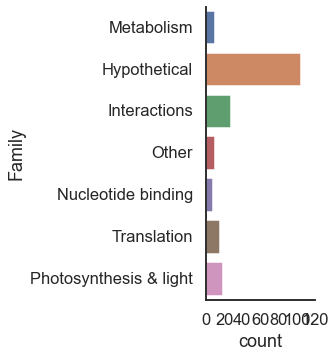

In [63]:
found_sorf_df['Family'] = found_sorf_df.family2.str.capitalize()
found_sorf_df.loc[found_sorf_df.Family.str.contains('Ccrg'), 'Family'] = 'Co Culture Related'
found_sorf_df.loc[found_sorf_df.Family.str.contains('Duf'), 'Family'] = 'Hypothetical'
found_sorf_df.loc[found_sorf_df.Family.str.contains('Carbox'), 'Family'] = 'Other'



sns.catplot(data=found_sorf_df.loc[found_sorf_df.otype.isin(['Annotated'])], y='Family', kind='count')

In [64]:
found_sorf_df.loc[found_sorf_df.otype.isin(['Annotated']) & found_sorf_df.Family.isin(['Other']), 'product'
                 ].value_counts().sort_index()


ATP-dependent Clp protease adapter ClpS    1
BMC domain-containing protein              1
Nif11 family protein                       1
NifU family protein                        1
PipX family protein                        1
YlxR family protein                        1
acyl carrier protein                       1
chemotaxis protein                         1
cupin domain-containing protein            1
guanylate-binding protein                  1
Name: product, dtype: int64

In [65]:
found_sorf_df.otype.value_counts()

Annotated       195
Intergenic      12 
Antisense       5  
Out of Frame    1  
Name: otype, dtype: int64

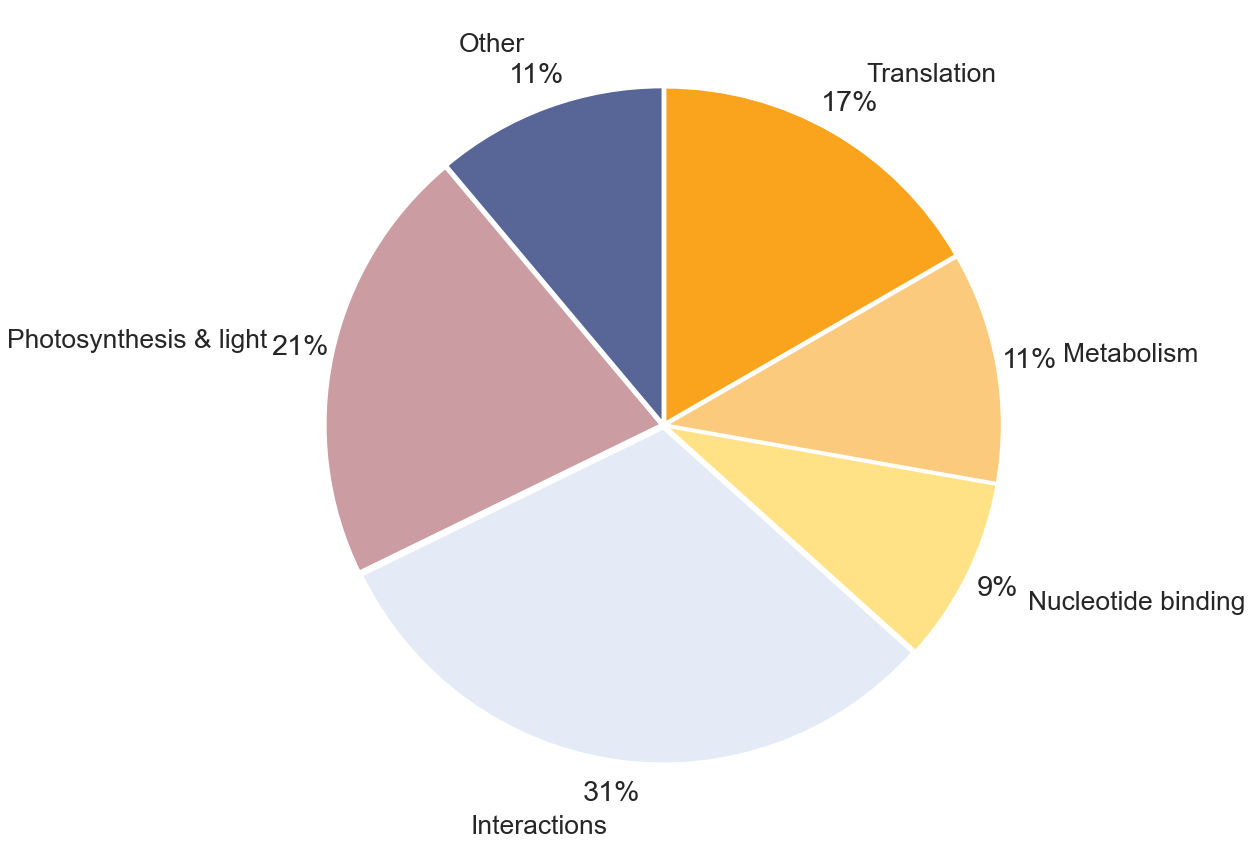

Text(0, 0.5, '')

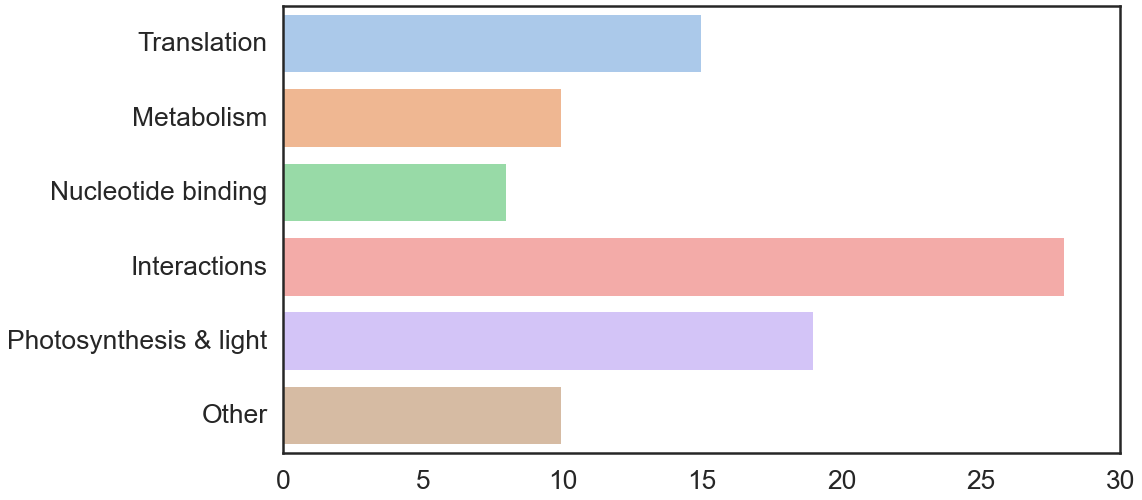

In [66]:
fig, ax = plt.subplots(figsize=(15,15))

pieorder = ['Translation','Metabolism', 'Nucleotide binding', 'Interactions', 'Photosynthesis & light', 'Other',
       ]
piepalette = ['#faa31c', '#fbca7d', '#ffe286', '#e4eaf6', '#cb9ca1', '#586697']
sns.set_context('poster', font_scale=1.2)
t = found_sorf_df.loc[found_sorf_df.otype.isin(['Annotated']) & ~found_sorf_df.Family.isin(['Hypothetical'])
                     ].groupby(['Family'])['otype'].count()
t = t.reindex(index=pieorder)
#t = t.sort_values(ascending=False)
plt.pie(t, labels=t.index,colors=piepalette, 
        autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2,
       startangle=90, counterclock=False, explode=(0.01,0.01,0.01,0.01,0.01,0.01)
       )
plt.show()
sns.barplot(y=t.index, x=t, palette='pastel')
plt.xlabel('')
plt.ylabel('')


In [67]:
t.index

Index(['Translation', 'Metabolism', 'Nucleotide binding', 'Interactions',
       'Photosynthesis & light', 'Other'],
      dtype='object', name='Family')

In [68]:
pd.set_eng_float_format()

In [69]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.precision', 0)
found_sorf_df.dropna(subset=['swis_description'])[['family2','otype', 'pro/syn genomes',
       'mean pro/syn alignments', 'product', 'swis_description', 'swis_e',
       'swis_coverage', 'swis_identity' ]]

,family2,otype,pro/syn genomes,mean pro/syn alignments,product,swis_description,swis_e,swis_coverage,swis_identity
2,Interactions,Annotated,13.000E+00,26.692E+00,Nif11-like leader peptide family natural product precursor,Lantipeptide prochlorosin 1.1; Short=Lantipeptide Pcn1.1; Flags: Precursor [Prochlorococcus marinus str. MIT 9313],0.000E-24,800.000E-03,730.000E-03
7,Nucleotide binding,Annotated,81.000E+00,1.000E+00,BolA family transcriptional regulator,Uncharacterized protein ssr3122 [Synechocystis sp. PCC 6803 substr. Kazusa],0.000E-24,1.000E+00,640.000E-03
15,Translation,Annotated,116.000E+00,1.000E+00,30S ribosomal protein S19,30S ribosomal protein S19 [Prochlorococcus marinus str. MIT 9303] >sp|Q7TUP5.1| RecName: Full=30S ribosomal protein S19 [Prochlorococcus marinus str. MIT 9313],0.000E-24,1.000E+00,1.000E+00
16,Translation,Annotated,86.000E+00,1.000E+00,50S ribosomal protein L29,50S ribosomal protein L29 [Prochlorococcus marinus str. MIT 9313],0.000E-24,1.000E+00,1.000E+00
19,Nucleotide binding,Annotated,82.000E+00,2.707E+00,response regulator transcription factor,Oxygen regulatory protein NreC; AltName: Full=Nitrogen regulation protein C [Staphylococcus aureus RF122] >sp|Q6GE42.1| RecName: Full=Oxygen regulatory protein NreC; AltName: Full=Nitrogen regulation protein C [Staphylococcus aureus subsp. aureus MRSA252],127.105E-12,610.000E-03,280.000E-03
24,Interactions,Annotated,10.000E+00,9.900E+00,Nif11-like leader peptide family natural product precursor,Lantipeptide prochlorosin 1.1; Short=Lantipeptide Pcn1.1; Flags: Precursor [Prochlorococcus marinus str. MIT 9313],10.984E-15,930.000E-03,520.000E-03
29,Translation,Annotated,113.000E+00,1.000E+00,30S ribosomal protein S15,30S ribosomal protein S15 [Prochlorococcus marinus str. MIT 9303] >sp|Q7TV07.1| RecName: Full=30S ribosomal protein S15 [Prochlorococcus marinus str. MIT 9313],0.000E-24,1.000E+00,1.000E+00
30,Translation,Annotated,110.000E+00,1.000E+00,30S ribosomal protein S18,30S ribosomal protein S18 [Prochlorococcus marinus str. MIT 9303] >sp|Q7TUZ8.1| RecName: Full=30S ribosomal protein S18 [Prochlorococcus marinus str. MIT 9313],0.000E-24,1.000E+00,1.000E+00
31,Translation,Annotated,108.000E+00,1.000E+00,50S ribosomal protein L32,50S ribosomal protein L32 [Prochlorococcus marinus str. MIT 9303] >sp|Q7V7I8.1| RecName: Full=50S ribosomal protein L32 [Prochlorococcus marinus str. MIT 9313],0.000E-24,1.000E+00,1.000E+00
32,Interactions,Out of Frame,13.000E+00,25.692E+00,Nif11-like leader peptide family natural product precursor,Lantipeptide prochlorosin 1.1; Short=Lantipeptide Pcn1.1; Flags: Precursor [Prochlorococcus marinus str. MIT 9313],0.000E-24,750.000E-03,660.000E-03


In [70]:
found_sorf_df.columns

Index(['AAs', 'Coverage', 'Description', 'Gene', 'Unique Peptides', 'aa_len',
       'aa_sequence', 'aa_sequence_overlap', 'aaseq', 'best log prob',
       'best_score', 'contig', 'contig_id', 'contig_id_overlap', 'db_xref',
       'family', 'figfam', 'figfam_overlap', 'function', 'function_overlap',
       'gene_id', 'gene_id_overlap', 'genome', 'genome_overlap',
       'has unique peptides', 'is_downstream', 'is_inside', 'is_out_of_frame',
       'is_same_strand', 'is_upstream', 'left', 'left_overlap', 'left_r',
       'len_aa', 'len_aa3', 'len_nn', 'location', 'location_overlap',
       'log_prob', 'merge_location', 'mod_peptides', 'ms_detected',
       'multiple unique peptides', 'nucleotide_sequence',
       'nucleotide_sequence_overlap', 'num_spectra', 'old_locus_tag', 'orfid',
       'otype', 'overlap_count', 'overlap_gene_type', 'overlap_location',
       'overlap_strand', 'overlap_type', 'pmt_id', 'product', 'product_y',
       'protein_id', 'rast_left', 'rast_right', 'right',

In [71]:
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.precision', 0)
found_sorf_df.loc[found_sorf_df.otype.isin(['Intergenic', 'Antisense', 'Out of Frame']),
                  ['otype', 'orfid', #'mit9313 alignments','pro/syn genomes',
                   'strand', 
                  ]]

,otype,orfid,strand
3,Intergenic,ORF2068_BX548175.1:922530:922661,+
4,Intergenic,ORF2321_BX548175.1:1030986:1031147,+
32,Out of Frame,ORF7032_BX548175.1:905452:905715,+
35,Intergenic,ORF7224_BX548175.1:994741:994911,+
38,Intergenic,ORF7466_BX548175.1:1097200:1097379,+
54,Antisense,ORF9995_BX548175.1:2364358:2364552,+
60,Antisense,ORF12508_BX548175.1:1082192:1082350,+
72,Antisense,ORF14593_BX548175.1:2096789:2096866,+
73,Intergenic,ORF14768_BX548175.1:2186720:2186893,+
82,Intergenic,ORF16879_BX548175.1:1658121:1657948,-


In [72]:
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.precision', 0)
found_sorf_df.loc[found_sorf_df.otype.isin(['Out of Frame']),
                  ['orfid', #'mit9313 alignments','pro/syn genomes',
                   #'mean pro/syn alignments', 'pro_syn_accession', 
                   #'pro_syn_description','pro_syn_e', 'pro_syn_coverage',
       #'pro_syn_identity', 'cluster_id'
                   'function', 'product',
                   'strand',
                   'aaseq',
                   'gene_id_overlap','protein_id', 'overlap_location',
                   'aa_sequence_overlap',
                   'aa_sequence'
                  ]].T

# 905453..905716

,32
orfid,ORF7032_BX548175.1:905452:905715
function,None
product,Nif11-like leader peptide family natural product precursor
strand,+
aaseq,MSEEQLKAFIAKVQADASLQEQLRTEGADVVAIAKAAGFSITTEDLNSHRQNLSDDELEGVAGGGGKMTVRGRDMSCGCQDYWEDDY
gene_id_overlap,AKG35_RS04305
protein_id,
overlap_location,AKG35_RS04305
aa_sequence_overlap,
aa_sequence,None


In [73]:
1031011 - 1030986, 1031148- 1031147




(25, 1)

In [74]:
found_sorf_df.orfid.value_counts()

ORF9882_BX548175.1:2311447:2311626     1
ORF22973_BX548175.1:1354937:1354737    1
ORF5422_BX548175.1:182116:182298       1
ORF18399_BX548175.1:1009005:1008772    1
ORF9264_BX548175.1:2000251:2000370     1
                                      ..
ORF2353_BX548175.1:1042338:1042538     1
ORF23990_BX548175.1:895418:895221      1
ORF3558_BX548175.1:1633860:1634078     1
ORF20045_BX548175.1:274995:274750      1
ORF26367_BX548175.1:2238277:2238056    1
Name: orfid, Length: 213, dtype: int64

In [75]:
found_sorf_df.head()

,AAs,Coverage,Description,Gene,Unique Peptides,aa_len,aa_sequence,aa_sequence_overlap,aaseq,best log prob,...,mean pro/syn alignments,query_y,mit9313,mit9313 alignments,query,swis_description,swis_e,swis_coverage,swis_identity,Family
0,81.000E+00,41.970E+00,>lcl|ORF59_BX548175.1:26835:27080 unnamed protein product,NaN,4.000E+00,NaN,MTAQLVPDQQIDLRGTPCPINFIRCRLALEGLKDKERLQVDLDRGEPEAMVVPGLVEAGHRVEIIAQENTWLRLMVTCGGG,MTAQLVPDQQIDLRGTPCPINFIRCRLALEGLKDKERLQVDLDRGEPEAMVVPGLVEAGHRVEIIAQENTWLRLMVTCGGG,MTAQLVPDQQIDLRGTPCPINFIRCRLALEGLKDKERLQVDLDRGEPEAMVVPGLVEAGHRVEIIAQENTWLRLMVTCGGG,1.580E+00,...,1.000E+00,ORF59_BX548175.1:26835:27080,1.000E+00,1.000E+00,NaN,NaN,NaN,NaN,NaN,Metabolism
1,74.000E+00,20.270E+00,>lcl|ORF395_BX548175.1:178002:178226 unnamed protein product,NaN,2.000E+00,NaN,MKRLGYPLLSLAAPLLIVLAMLCLMHRQGSDRLQSIPAVLVGAGLIISGAVGRRRRRSKLLAALHSTQTEEQEH,MKRLGYPLLSLAAPLLIVLAMLCLMHRQGSDRLQSIPAVLVGAGLIISGAVGRRRRRSKLLAALHSTQTEEQEH,MKRLGYPLLSLAAPLLIVLAMLCLMHRQGSDRLQSIPAVLVGAGLIISGAVGRRRRRSKLLAALHSTQTEEQEH,1.520E+00,...,1.000E+00,ORF395_BX548175.1:178002:178226,1.000E+00,1.000E+00,NaN,NaN,NaN,NaN,NaN,Hypothetical
2,81.000E+00,35.800E+00,>lcl|ORF2049_BX548175.1:913137:913382 unnamed protein product,NaN,4.000E+00,NaN,MSEEQLKAFIAKVQGDTSLQEQLKAEGADVVAIAKAAGFSITTEDLNTHRQTLSDRELEGVAGGTTAFTGVDTESIAFCCS,MSEEQLKAFIAKVQGDTSLQEQLKAEGADVVAIAKAAGFSITTEDLNTHRQTLSDRELEGVAGGTTAFTGVDTESIAFCCS,MSEEQLKAFIAKVQGDTSLQEQLKAEGADVVAIAKAAGFSITTEDLNTHRQTLSDRELEGVAGGTTAFTGVDTESIAFCCS,1.570E+00,...,26.692E+00,ORF2049_BX548175.1:913137:913382,1.000E+00,34.000E+00,ORF2049_BX548175.1:913137:913382,Lantipeptide prochlorosin 1.1; Short=Lantipeptide Pcn1.1; Flags: Precursor [Prochlorococcus mari...,0.000E-24,800.000E-03,730.000E-03,Interactions
3,43.000E+00,27.910E+00,>lcl|ORF2068_BX548175.1:922530:922661 unnamed protein product,NaN,1.000E+00,NaN,None,,MMGKTKQHKKLVSWAEKAELCATREEAQKLIRKAEKAHAKLES,1.520E+00,...,1.000E+00,ORF2068_BX548175.1:922530:922661,1.000E+00,1.000E+00,NaN,NaN,NaN,NaN,NaN,N/a
4,53.000E+00,58.490E+00,>lcl|ORF2321_BX548175.1:1030986:1031147 unnamed protein product,NaN,6.000E+00,NaN,None,,MLSKSITGMFGRRNKKDAPKEEPTETDLERGYRLAAAKQKEILKELLAQKPRA,1.580E+00,...,3.000E+00,ORF2321_BX548175.1:1030986:1031147,1.000E+00,3.000E+00,NaN,NaN,NaN,NaN,NaN,N/a


In [76]:
blastn_vs_pro_df.loc[blastn_vs_pro_df['query'].str.contains('ORF2321_BX548175.1:1030986:1031147')]

,query,pro_syn,pro_syn_accession,pro_syn_hsps,pro_syn_coverage,pro_syn_identity
154,ORF2321_BX548175.1:1030986:1031147,Prochlorococcus marinus MIT9313 complete genome,BX548175,3,1.030E+00,840.000E-03
155,ORF2321_BX548175.1:1030986:1031147,"Prochlorococcus marinus str. MIT 9303, complete genome",CP000554,3,980.000E-03,770.000E-03


In [77]:
found_sorf_df.nlargest(10, ['pro/syn genomes'])

,AAs,Coverage,Description,Gene,Unique Peptides,aa_len,aa_sequence,aa_sequence_overlap,aaseq,best log prob,...,mean pro/syn alignments,query_y,mit9313,mit9313 alignments,query,swis_description,swis_e,swis_coverage,swis_identity,Family
15,91.000E+00,70.330E+00,>lcl|ORF3964_BX548175.1:1838136:1838411 unnamed protein product,NaN,12.000E+00,NaN,MGRSLKKGPFIADSLLRKLEKQNADDDKSVIKTWSRASTILPMMIGHTIAVHNGRSHVPVFITEQMVGHKLGEFAPTRTFKGHIKDKKGGR,MGRSLKKGPFIADSLLRKLEKQNADDDKSVIKTWSRASTILPMMIGHTIAVHNGRSHVPVFITEQMVGHKLGEFAPTRTFKGHIKDKKGGR,MGRSLKKGPFIADSLLRKLEKQNADDDKSVIKTWSRASTILPMMIGHTIAVHNGRSHVPVFITEQMVGHKLGEFAPTRTFKGHIKDKKGGR,1.600E+00,...,1.000E+00,ORF3964_BX548175.1:1838136:1838411,1.000E+00,1.000E+00,ORF3964_BX548175.1:1838136:1838411,30S ribosomal protein S19 [Prochlorococcus marinus str. MIT 9303] >sp|Q7TUP5.1| RecName: Full=30...,0.000E-24,1.000E+00,1.000E+00,Translation
63,88.000E+00,56.820E+00,>lcl|ORF13351_BX548175.1:1509413:1509679 unnamed protein product,NaN,6.000E+00,NaN,MAHKKGTGSTRNGRDSNSKRLGVKAYGGETVTAGSILIRQRGTSVLPGVNVGQGKDDTLFALTDGVVAFESIRRSLRNRKRISVVASS,MAHKKGTGSTRNGRDSNSKRLGVKAYGGETVTAGSILIRQRGTSVLPGVNVGQGKDDTLFALTDGVVAFESIRRSLRNRKRISVVASS,MAHKKGTGSTRNGRDSNSKRLGVKAYGGETVTAGSILIRQRGTSVLPGVNVGQGKDDTLFALTDGVVAFESIRRSLRNRKRISVVASS,3.150E+00,...,1.000E+00,ORF13351_BX548175.1:1509413:1509679,1.000E+00,1.000E+00,ORF13351_BX548175.1:1509413:1509679,50S ribosomal protein L27 [Prochlorococcus marinus str. MIT 9313],0.000E-24,1.000E+00,1.000E+00,Translation
69,88.000E+00,69.320E+00,>lcl|ORF14108_BX548175.1:1840259:1840525 unnamed protein product,NaN,16.000E+00,NaN,MALKERLGTVVSDKMDKTVVVAVENRFPHPIYQKTVSRTTRYKAHDAGNTCRVGDRVRITETRPLSRSKRWTVAEVLSHSPKAQEVST,MALKERLGTVVSDKMDKTVVVAVENRFPHPIYQKTVSRTTRYKAHDAGNTCRVGDRVRITETRPLSRSKRWTVAEVLSHSPKAQEVST,MALKERLGTVVSDKMDKTVVVAVENRFPHPIYQKTVSRTTRYKAHDAGNTCRVGDRVRITETRPLSRSKRWTVAEVLSHSPKAQEVST,1.580E+00,...,1.009E+00,ORF14108_BX548175.1:1840259:1840525,1.000E+00,1.000E+00,ORF14108_BX548175.1:1840259:1840525,30S ribosomal protein S17 [Prochlorococcus marinus str. MIT 9313],0.000E-24,1.000E+00,1.000E+00,Translation
70,93.000E+00,83.870E+00,>lcl|ORF14128_BX548175.1:1850909:1851190 unnamed protein product,NaN,16.000E+00,NaN,MPKPDIHPNWYPDAKVICNGEVVMTTGSTQPELHVDVWSGNHPFFTGTQKILDTEGRVDRFMRKYGMGSADAAADEKKPDAKNNNKDNTSKED,MPKPDIHPNWYPDAKVICNGEVVMTTGSTQPELHVDVWSGNHPFFTGTQKILDTEGRVDRFMRKYGMGSADAAADEKKPDAKNNNKDNTSKED,MPKPDIHPNWYPDAKVICNGEVVMTTGSTQPELHVDVWSGNHPFFTGTQKILDTEGRVDRFMRKYGMGSADAAADEKKPDAKNNNKDNTSKED,5.770E+00,...,1.000E+00,ORF14128_BX548175.1:1850909:1851190,1.000E+00,1.000E+00,ORF14128_BX548175.1:1850909:1851190,50S ribosomal protein L31 [Prochlorococcus marinus str. MIT 9313],0.000E-24,1.000E+00,1.000E+00,Translation
29,89.000E+00,74.160E+00,>lcl|ORF6596_BX548175.1:698671:698940 unnamed protein product,NaN,19.000E+00,NaN,MSLDTTEKQQLINANQTHGTDTGSVEVQVAMLSERITKLSSHLQENKHDFSSRQGLLKMIGRRKRLLSYVRGKSEQRYNGLITKLGIRG,MSLDTTEKQQLINANQTHGTDTGSVEVQVAMLSERITKLSSHLQENKHDFSSRQGLLKMIGRRKRLLSYVRGKSEQRYNGLITKLGIRG,MSLDTTEKQQLINANQTHGTDTGSVEVQVAMLSERITKLSSHLQENKHDFSSRQGLLKMIGRRKRLLSYVRGKSEQRYNGLITKLGIRG,2.420E+00,...,1.000E+00,ORF6596_BX548175.1:698671:698940,1.000E+00,1.000E+00,ORF6596_BX548175.1:698671:698940,30S ribosomal protein S15 [Prochlorococcus marinus str. MIT 9303] >sp|Q7TV07.1| RecName: Full=30...,0.000E-24,1.000E+00,1.000E+00,Translation
97,78.000E+00,75.640E+00,>lcl|ORF19047_BX548175.1:750573:750337 unnamed protein product,NaN,15.000E+00,NaN,MSRVCQLTGTRANNGMAVSHSHIRTKKLQQANLQQRRLWWAEGNRWLKLRVSTRALKTIQKKGLGVYAKSLGIDLNKI,MSRVCQLTGTRANNGMAVSHSHIRTKKLQQANLQQRRLWWAEGNRWLKLRVSTRALKTIQKKGLGVYAKSLGIDLNKI,MSRVCQLTGTRANNGMAVSHSHIRTKKLQQANLQQRRLWWAEGNRWLKLRVSTRALKTIQKKGLGVYAKSLGIDLNKI,1.580E+00,...,1.000E+00,ORF19047_BX548175.1:750573:750337,1.000E+00,1.000E+00,ORF19047_BX548175.1:750573:750337,50S ribosomal protein L28 [Prochlorococcus marinus str. MIT 9303] >sp|Q7V7P3.1| RecName: Full=50...,0.000E-24,1.000E+00,1.000E+00,Translation
168,65.000E+00,55.380E+00,>AKG35_RS00300 50S ribosomal protein L35,NaN,7.000E+00,65.00

In [78]:
found_sorf_df.nsmallest(10, ['pro/syn genomes'])

,AAs,Coverage,Description,Gene,Unique Peptides,aa_len,aa_sequence,aa_sequence_overlap,aaseq,best log prob,...,mean pro/syn alignments,query_y,mit9313,mit9313 alignments,query,swis_description,swis_e,swis_coverage,swis_identity,Family
4,53.000E+00,58.490E+00,>lcl|ORF2321_BX548175.1:1030986:1031147 unnamed protein product,NaN,6.000E+00,NaN,None,,MLSKSITGMFGRRNKKDAPKEEPTETDLERGYRLAAAKQKEILKELLAQKPRA,1.580E+00,...,3.000E+00,ORF2321_BX548175.1:1030986:1031147,1.000E+00,3.000E+00,NaN,NaN,NaN,NaN,NaN,N/a
5,84.000E+00,80.950E+00,>lcl|ORF2340_BX548175.1:1038120:1038374 unnamed protein product,NaN,9.000E+00,NaN,MYSLFDSVFDVPFGYSIPRDRVVVIPDSQYNKLRAQENERQVAKLEARKEHHSQVIERLNEQISELQAALPAAEPDKELAATKE,MYSLFDSVFDVPFGYSIPRDRVVVIPDSQYNKLRAQENERQVAKLEARKEHHSQVIERLNEQISELQAALPAAEPDKELAATKE,MYSLFDSVFDVPFGYSIPRDRVVVIPDSQYNKLRAQENERQVAKLEARKEHHSQVIERLNEQISELQAALPAAEPDKELAATKE,1.590E+00,...,6.000E+00,ORF2340_BX548175.1:1038120:1038374,1.000E+00,7.000E+00,NaN,NaN,NaN,NaN,NaN,Other
10,98.000E+00,35.710E+00,>lcl|ORF3835_BX548175.1:1762950:1763246 unnamed protein product,NaN,4.000E+00,NaN,MRFIEFLDQRFCNSQEIREINHRGISAGFDGFREVWELDYLYEHFEADIHEIIEETGYLDSDLKDEFDNEETLRMKLVWFAVSTYCLSRTDALVEAKD,MRFIEFLDQRFCNSQEIREINHRGISAGFDGFREVWELDYLYEHFEADIHEIIEETGYLDSDLKDEFDNEETLRMKLVWFAVSTYCLSRTDALVEAKD,MRFIEFLDQRFCNSQEIREINHRGISAGFDGFREVWELDYLYEHFEADIHEIIEETGYLDSDLKDEFDNEETLRMKLVWFAVSTYCLSRTDALVEAKD,1.520E+00,...,1.000E+00,ORF3835_BX548175.1:1762950:1763246,1.000E+00,1.000E+00,NaN,NaN,NaN,NaN,NaN,Hypothetical
20,51.000E+00,41.180E+00,>lcl|ORF4637_BX548175.1:2186205:2186360 unnamed protein product,NaN,3.000E+00,NaN,MSSSEKELDLRIDHLQKELALAEQERDILRAAKMQQKILMKLLKENPSRQV,MSSSEKELDLRIDHLQKELALAEQERDILRAAKMQQKILMKLLKENPSRQV,MSSSEKELDLRIDHLQKELALAEQERDILRAAKMQQKILMKLLKENPSRQV,1.520E+00,...,1.000E+00,ORF4637_BX548175.1:2186205:2186360,1.000E+00,1.000E+00,NaN,NaN,NaN,NaN,NaN,Hypothetical
33,51.000E+00,58.820E+00,>lcl|ORF7084_BX548175.1:929743:929898 unnamed protein product,NaN,2.000E+00,NaN,MRQSFAGTTGAVQPLATPRIQSIREKISIQELELRLTRLGLATTTHTPNPS,MRQSFAGTTGAVQPLATPRIQSIREKISIQELELRLTRLGLATTTHTPNPS,MRQSFAGTTGAVQPLATPRIQSIREKISIQELELRLTRLGLATTTHTPNPS,1.580E+00,...,1.000E+00,ORF7084_BX548175.1:929743:929898,1.000E+00,1.000E+00,NaN,NaN,NaN,NaN,NaN,Hypothetical
34,52.000E+00,73.080E+00,>lcl|ORF7163_BX548175.1:972145:972303 unnamed protein product,NaN,3.000E+00,NaN,MPSVKPRVGWIIDPELLSLLKELADKSGRTVPKEAEQAIKNWLQLHGNLPQD,MPSVKPRVGWIIDPELLSLLKELADKSGRTVPKEAEQAIKNWLQLHGNLPQD,MPSVKPRVGWIIDPELLSLLKELADKSGRTVPKEAEQAIKNWLQLHGNLPQD,1.580E+00,...,1.000E+00,ORF7163_BX548175.1:972145:972303,1.000E+00,1.000E+00,NaN,NaN,NaN,NaN,NaN,Hypothetical
35,56.000E+00,51.780E+00,>lcl|ORF7224_BX548175.1:994741:994911 unnamed protein product,NaN,2.000E+00,NaN,None,,MATLLQATGVELEPCLCEHCCQIRSQQKESQRVWQLPKFQSGCWQRLDLHHSSKAT,1.580E+00,...,1.000E+00,ORF7224_BX548175.1:994741:994911,1.000E+00,1.000E+00,NaN,NaN,NaN,NaN,NaN,N/a
36,61.000E+00,73.770E+00,>lcl|ORF7228_BX548175.1:995548:995733 unnamed protein product,NaN,5.000E+00,NaN,MNNTIKRTSVTRGLTNIHTIKLAVLDAIEYAEQRGDLNLALAYAALLKKDLDPLIKERLGL,MNNTIKRTSVTRGLTNIHTIKLAVLDAIEYAEQRGDLNLALAYAALLKKDLDPLIKERLGL,MNNTIKRTSVTRGLTNIHTIKLAVLDAIEYAEQRGDLNLALAYAALLKKDLDPLIKERLGL,1.580E+00,...,1.000E+00,ORF7228_BX548175.1:995548:995733,1.000E+00,1.000E+00,NaN,NaN,NaN,NaN,NaN,Hypothetical
39,38.000E+00,23.680E+00,>lcl|ORF7541_BX548175.1:1129495:1129611 unnamed protein product,NaN,1.000E+00,NaN,MILIVLLPILLAATWAFINIRGAALKQQGLGLVSKNKG,MILIVLLPILLAATWAFINIRGAALKQQGLGLVSKNKG,MILIVLLPILLAATWAFINIRGAALKQQGLGLVSKNKG,1.570E+00,...,1.000E+00,ORF7541_BX548175.1:1129495:1129611,1.000E+00,1.000E+00,ORF7541_BX548175.1:1129495:1129611,Photosystem II protein Y [Prochlorococcus marinus str. MIT 9313],408.579E-21,1.000E+00,1.000E+00,Photosynthesis & light
61,92.000E+00,46.740E+00,>lcl|ORF12615_BX548175.1:1123541:1123819 unnamed protein product,NaN,6.000E+00,NaN,MGRNVGDPIDPLDGAPKWMQRWLAPPIIWWRGVEDQQVSAIHALLLGGPALFVMILWFFGVNADPNGIGSVASCPAEWKCLGLGWLLNFSGA,MGRNVGDPIDPLDGAPKWMQRWLAPPIIWWRGVEDQQVSAIHALLLGGPALFVMILWFFGVNADPN

In [79]:
found_sorf_df.protein_id

0      WP_011129402.1
1      WP_011129537.1
2      WP_011130214.1
3                    
4                    
            ...      
208    WP_011130895.1
209    WP_041385121.1
210    WP_011130414.1
211    WP_011130358.1
212    WP_041384453.1
Name: protein_id, Length: 213, dtype: object

In [80]:
#sns.clustermap()
blastn_vs_pro_df.head()

,query,pro_syn,pro_syn_accession,pro_syn_hsps,pro_syn_coverage,pro_syn_identity
0,ORF59_BX548175.1:26835:27080,Prochlorococcus marinus MIT9313 complete genome,BX548175,1,1.000E+00,1.000E+00
1,ORF59_BX548175.1:26835:27080,"Prochlorococcus marinus str. MIT 9303, complete genome",CP000554,1,1.000E+00,990.000E-03
2,ORF59_BX548175.1:26835:27080,"Synechococcus sp. ROS8604 chromosome, complete genome",CP047946,1,910.000E-03,600.000E-03
3,ORF59_BX548175.1:26835:27080,"Synechococcus sp. A15-28 chromosome, complete genome",CP047931,1,890.000E-03,580.000E-03
4,ORF59_BX548175.1:26835:27080,"Synechococcus sp. CC9311, complete genome",CP000435,1,930.000E-03,570.000E-03


In [81]:
found_sorf_df.columns

Index(['AAs', 'Coverage', 'Description', 'Gene', 'Unique Peptides', 'aa_len',
       'aa_sequence', 'aa_sequence_overlap', 'aaseq', 'best log prob',
       'best_score', 'contig', 'contig_id', 'contig_id_overlap', 'db_xref',
       'family', 'figfam', 'figfam_overlap', 'function', 'function_overlap',
       'gene_id', 'gene_id_overlap', 'genome', 'genome_overlap',
       'has unique peptides', 'is_downstream', 'is_inside', 'is_out_of_frame',
       'is_same_strand', 'is_upstream', 'left', 'left_overlap', 'left_r',
       'len_aa', 'len_aa3', 'len_nn', 'location', 'location_overlap',
       'log_prob', 'merge_location', 'mod_peptides', 'ms_detected',
       'multiple unique peptides', 'nucleotide_sequence',
       'nucleotide_sequence_overlap', 'num_spectra', 'old_locus_tag', 'orfid',
       'otype', 'overlap_count', 'overlap_gene_type', 'overlap_location',
       'overlap_strand', 'overlap_type', 'pmt_id', 'product', 'product_y',
       'protein_id', 'rast_left', 'rast_right', 'right',

In [82]:
blastn_vs_pro_df['Group'] = np.NaN
blastn_vs_pro_df.loc[blastn_vs_pro_df['pro_syn'].str.contains('prochlorococcus', case=False), 'Group'] = 'PRO'
blastn_vs_pro_df.loc[blastn_vs_pro_df['pro_syn'].str.contains('synechococcus', case=False), 'Group'] = 'SYN'



In [83]:
blastn_vs_pro_df.loc[blastn_vs_pro_df.Group.isna()]

,query,pro_syn,pro_syn_accession,pro_syn_hsps,pro_syn_coverage,pro_syn_identity,Group
6509,ORF27991_BX548175.1:1517947:1517648,"A.nidulans petF gene encoding ferredoxin I, complete cds",M14482,1,1.000E+00,810.000E-03,NaN
6511,ORF27991_BX548175.1:1517947:1517648,"A.nidulans ferredoxin (petF1) gene, complete cds",M35127,1,1.000E+00,810.000E-03,NaN
6522,ORF27991_BX548175.1:1517947:1517648,S.elongatus petF1 gene,Y10288,1,1.000E+00,750.000E-03,NaN
8309,AKG35_RS00965,S.elangatus psaE gene and fpg gene,Y10290,1,1.000E+00,540.000E-03,NaN


In [84]:
row_col = found_sorf_df.groupby(['orfid'])['Family'].first()
row_col
N=5
base_pal = sns.color_palette('PuBuGn_r', N).as_hex()

hmorder = pieorder + ['Hypothetical', 'N/a']
hmpalette = piepalette + ['lightyellow', base_pal[1]]

#Create a dictionary where the key is the category and the values are the
#colors from the palette we just created
row_pal = dict(zip(hmorder, hmpalette))

col_col = blastn_vs_pro_df.groupby(['pro_syn'])['Group'].first()
col_palette = sns.color_palette('Set1', len(col_col.unique()))

#Create a dictionary where the key is the category and the values are the
#colors from the palette we just created
col_pal = dict(zip(col_col.unique(), col_palette))



In [85]:
col_col


pro_syn
A.nidulans ferredoxin (petF1) gene, complete cds                                    NaN
A.nidulans petF gene encoding ferredoxin I, complete cds                            NaN
Anacystis nidulans R2 (= Synechococcus PCC7942) ferredoxin gene                     SYN
Cyanobacterium Synechococcus 6301 DNA for ATP synthase subunits                     SYN
Prochlorococcus marinus MED4 complete genome                                        PRO
                                                                                   ... 
Uncultured marine type-A Synechococcus GOM 3O12 rbcL-containing genomic sequence    SYN
Uncultured marine type-A Synechococcus GOM 3O6 rbcL-containing genomic sequence     SYN
Uncultured marine type-A Synechococcus GOM 4N23 rbcL-containing genomic sequence    SYN
Uncultured marine type-A Synechococcus GOM 4P21 rbcL-containing genomic sequence    SYN
Uncultured marine type-A Synechococcus GOM 5D20 rbcL-containing genomic sequence    SYN
Name: Group, Length: 587

In [86]:
col_col.value_counts()

SYN    502
PRO     81
Name: Group, dtype: int64

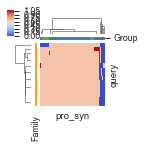

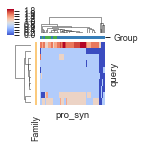

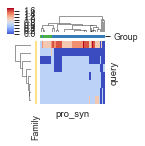

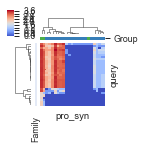

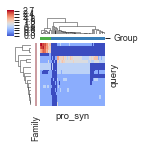

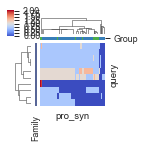

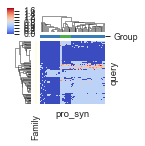

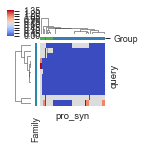

In [87]:
final_sorted_orfids = []
lineloc = [0]
for i in hmorder:
    sns.set_context('paper')
    orfids_sorted =found_sorf_df.loc[found_sorf_df.otype.isin(['Annotated', 'Intergenic']) &
                                     found_sorf_df.Family.isin([i])
                                    ].sort_values(by=['Family'])['orfid']
    blastn_vs_pro_df['log_hsps'] = np.log(blastn_vs_pro_df['pro_syn_hsps']+1)
    pivotdf = blastn_vs_pro_df.loc[
        blastn_vs_pro_df['query'].isin(orfids_sorted) & 
        blastn_vs_pro_df['pro_syn'].str.contains('complete genome', case=False) &
        ~blastn_vs_pro_df['pro_syn'].str.contains(' gene', case=False) &    
        ~blastn_vs_pro_df['pro_syn'].str.contains(' region', case=False) &
        ~blastn_vs_pro_df['pro_syn'].str.contains(' partial', case=False) &
        ~blastn_vs_pro_df['pro_syn'].str.contains(' subunits', case=False) &
        ~blastn_vs_pro_df['pro_syn'].str.contains(' genomic sequence', case=False) &
        ~blastn_vs_pro_df['pro_syn'].str.contains(' plasmid', case=False)
    ].pivot_table(columns=['pro_syn'], index='query', values=['log_hsps'],
                                          fill_value=0, 
                                          ).droplevel(0,axis=1)
    #pivotdf = pivotdf.reindex(index=orfids_sorted).dropna(axis='index')


    row_colors = row_col[pivotdf.index].map(row_pal)
    col_colors = col_col[pivotdf.columns].map(col_pal)

    g = sns.clustermap(data=pivotdf, cmap='coolwarm', row_colors=row_colors, col_colors=col_colors,
                       #col_cluster=False,# row_linkage=False,
                       figsize=(2,2),
                      linewidths=0, xticklabels=False, yticklabels=False)
    
    row_order = g.dendrogram_row.reordered_ind
    srowindex = pivotdf.index[row_order]
    final_sorted_orfids.extend(srowindex)
    lineloc.append(len(srowindex) + lineloc[-1])





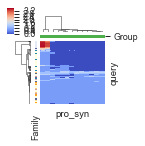

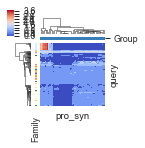

In [88]:
final_sorted_genomes = []
for i in ['PRO', 'SYN']:
    sns.set_context('paper')
    orfids_sorted =found_sorf_df.loc[found_sorf_df.otype.isin(['Annotated', 'Intergenic']) 
                                    ].sort_values(by=['Family'])['orfid']
    blastn_vs_pro_df['log_hsps'] = np.log(blastn_vs_pro_df['pro_syn_hsps']+1)
    pivotdf = blastn_vs_pro_df.loc[
        blastn_vs_pro_df['query'].isin(orfids_sorted) & 
        ~blastn_vs_pro_df['pro_syn'].str.contains(' gene', case=False) &    
        ~blastn_vs_pro_df['pro_syn'].str.contains(' region', case=False) &
        ~blastn_vs_pro_df['pro_syn'].str.contains(' partial', case=False) &
        ~blastn_vs_pro_df['pro_syn'].str.contains(' subunits', case=False) &
        ~blastn_vs_pro_df['pro_syn'].str.contains(' genomic sequence', case=False) &
        ~blastn_vs_pro_df['pro_syn'].str.contains(' plasmid', case=False) &
        ~blastn_vs_pro_df['pro_syn'].str.contains(' complete genome; segment', case=False) &
        blastn_vs_pro_df['pro_syn'].str.contains('complete genome', case=False) &
        blastn_vs_pro_df['Group'].isin([i])

    ].pivot_table(columns=['pro_syn'], index='query', values=['log_hsps'],
                                          fill_value=0, 
                                          ).droplevel(0,axis=1)
    #pivotdf = pivotdf.reindex(index=orfids_sorted).dropna(axis='index')


    row_colors = row_col[pivotdf.index].map(row_pal)
    col_colors = col_col[pivotdf.columns].map(col_pal)

    g = sns.clustermap(data=pivotdf, cmap='coolwarm', row_colors=row_colors, col_colors=col_colors,
                       #col_cluster=False,# row_linkage=False,
                       figsize=(2,2),
                      linewidths=0, xticklabels=False, yticklabels=False)
    
    col_order = g.dendrogram_col.reordered_ind
    scolindex = pivotdf.columns[col_order]
    final_sorted_genomes.extend(scolindex)





In [89]:
len(final_sorted_orfids), len(final_sorted_genomes)

(206, 67)

In [90]:
lineloc

[0, 15, 25, 33, 61, 79, 89, 194, 206]

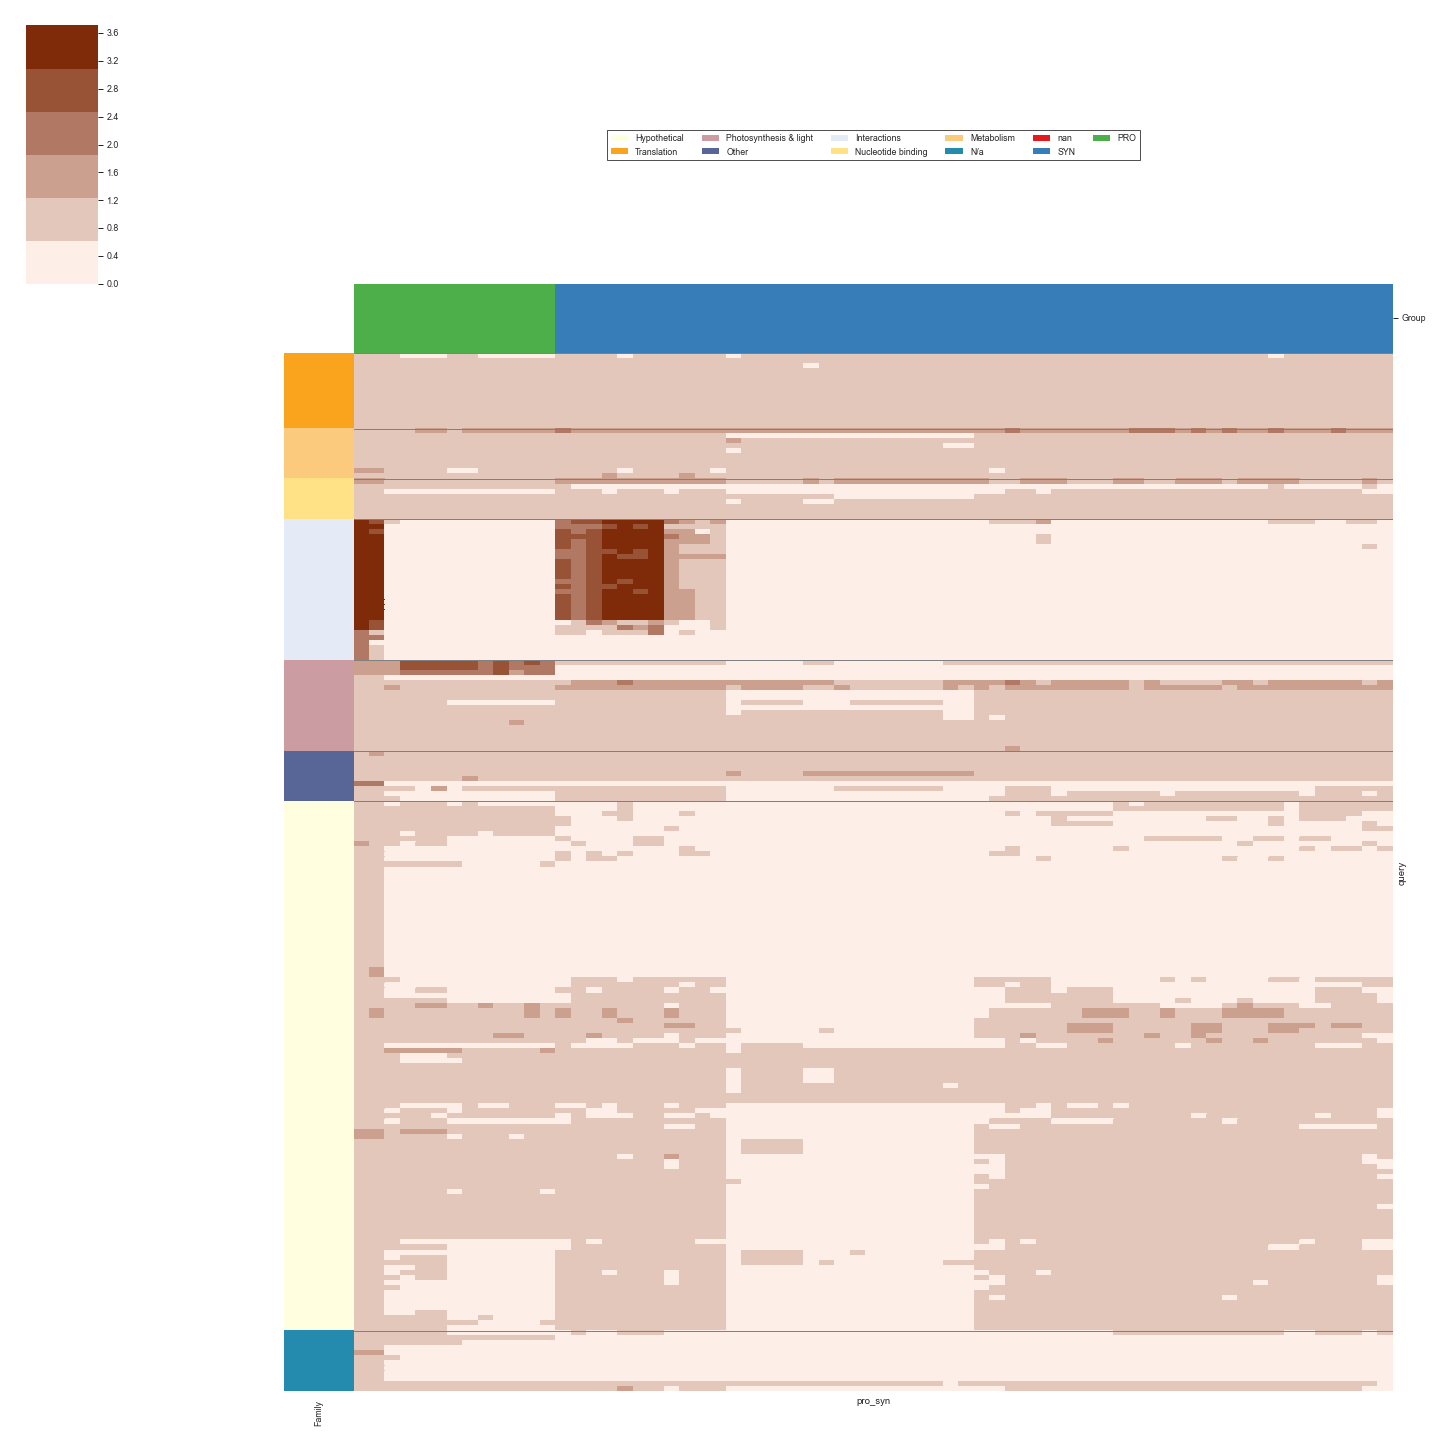

In [102]:

sns.set_context('paper')
blastn_vs_pro_df['log_hsps'] = np.log(blastn_vs_pro_df['pro_syn_hsps']+1)
pivotdf = blastn_vs_pro_df.loc[
    blastn_vs_pro_df['query'].isin(final_sorted_orfids) & 
    blastn_vs_pro_df['pro_syn'].str.contains('complete genome', case=False) &
    ~blastn_vs_pro_df['pro_syn'].str.contains(' gene', case=False) &    
    ~blastn_vs_pro_df['pro_syn'].str.contains(' region', case=False) &
    ~blastn_vs_pro_df['pro_syn'].str.contains(' partial', case=False) &
    ~blastn_vs_pro_df['pro_syn'].str.contains(' subunits', case=False) &
    ~blastn_vs_pro_df['pro_syn'].str.contains(' genomic sequence', case=False) &
    ~blastn_vs_pro_df['pro_syn'].str.contains(' plasmid', case=False) &
    blastn_vs_pro_df['pro_syn'].isin(final_sorted_genomes)
    
].pivot_table(columns=['pro_syn'], index='query', values=['log_hsps'],
                                      fill_value=0, 
                                      ).droplevel(0,axis=1)
pivotdf = pivotdf.reindex(index=final_sorted_orfids).dropna(axis='index')
pivotdf = pivotdf.reindex(columns=final_sorted_genomes)


row_colors = row_col[pivotdf.index].map(row_pal)
col_colors = col_col[pivotdf.columns].map(col_pal)

g = sns.clustermap(data=pivotdf, cmap=sns.light_palette("reddish brown",  input="xkcd"), row_colors=row_colors, col_colors=col_colors,
                   row_cluster=False, col_cluster=False, # row_linkage=False,
                  linewidths=0, xticklabels=False, yticklabels=False,
                  colors_ratio=0.05,
                       figsize=(20,20),
                  )



for label in row_col.unique():
    g.ax_col_dendrogram.bar(0, 0, color=row_pal[label],
                            label=label, linewidth=0)
for label in col_col.unique():
    g.ax_col_dendrogram.bar(0, 0, color=col_pal[label],
                            label=label, linewidth=0)
    
g.ax_col_dendrogram.legend(loc="center", ncol=6)
#g.cax.set_position([.15, .2, .03, .45])

for i in lineloc:
    #g.ax_heatmap.axhline(i, lw=1,c='lightyellow')
    g.ax_heatmap.axhline(i, lw=1,c='grey')



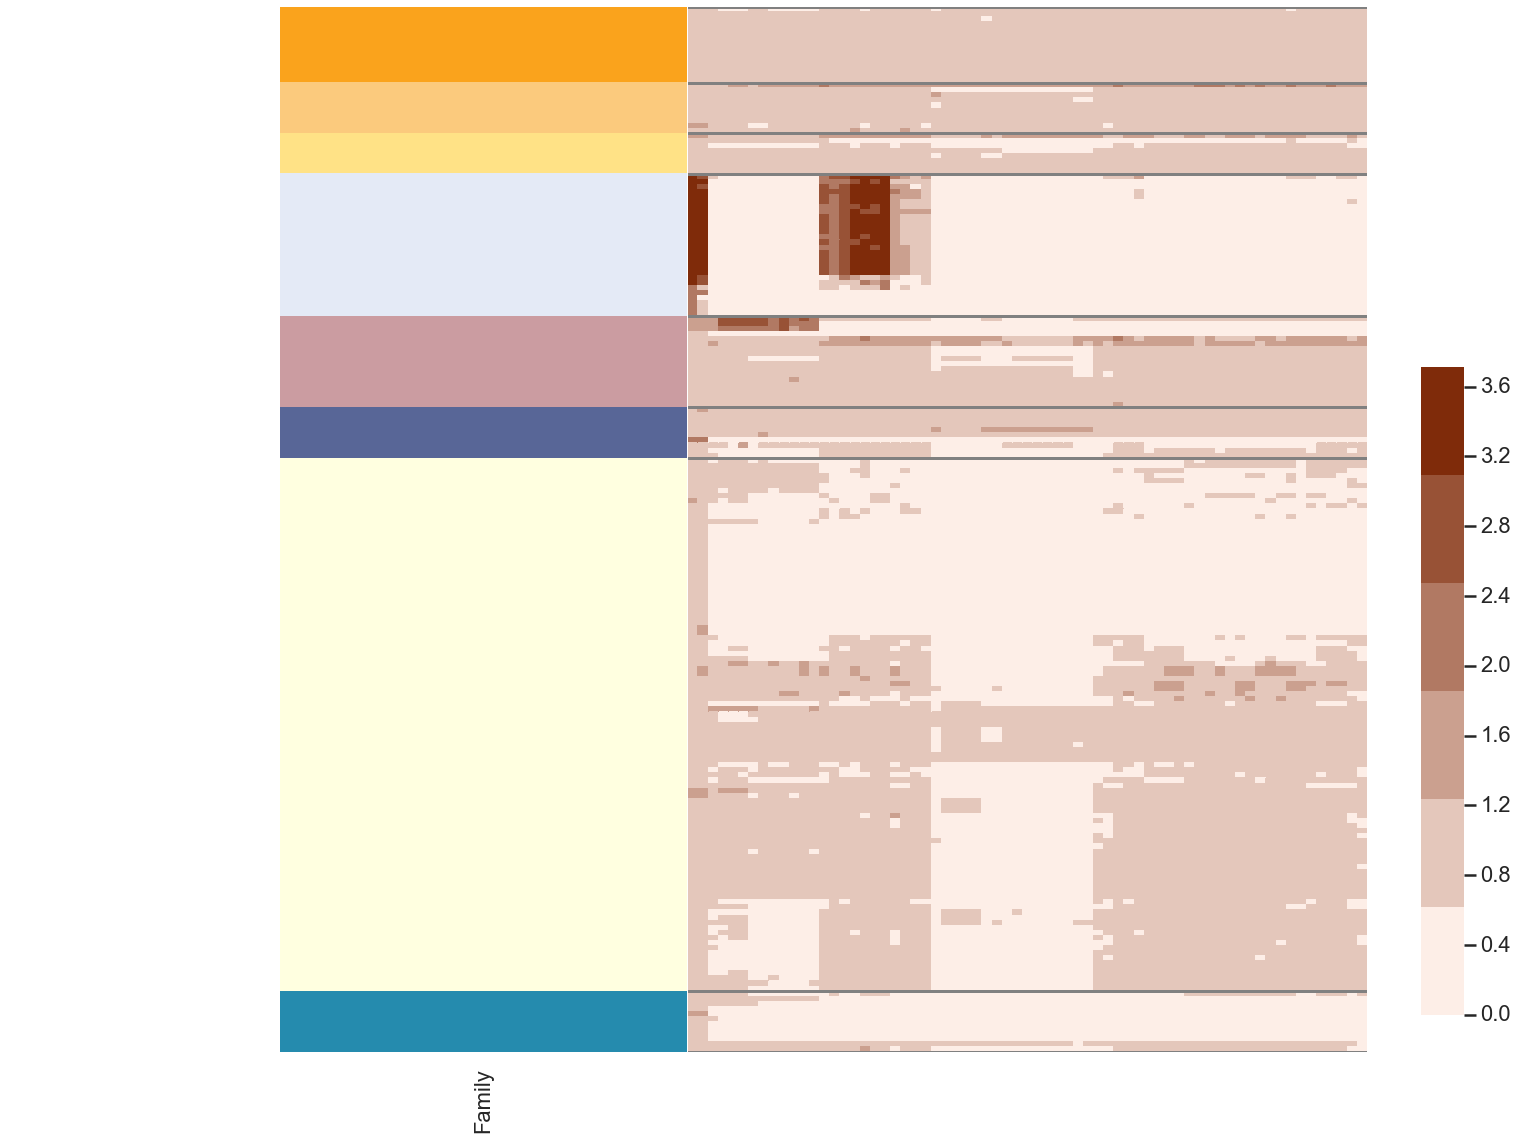

In [128]:

sns.set_context('poster')
blastn_vs_pro_df['log_hsps'] = np.log(blastn_vs_pro_df['pro_syn_hsps']+1)
pivotdf = blastn_vs_pro_df.loc[
    blastn_vs_pro_df['query'].isin(final_sorted_orfids) & 
    blastn_vs_pro_df['pro_syn'].str.contains('complete genome', case=False) &
    ~blastn_vs_pro_df['pro_syn'].str.contains(' gene', case=False) &    
    ~blastn_vs_pro_df['pro_syn'].str.contains(' region', case=False) &
    ~blastn_vs_pro_df['pro_syn'].str.contains(' partial', case=False) &
    ~blastn_vs_pro_df['pro_syn'].str.contains(' subunits', case=False) &
    ~blastn_vs_pro_df['pro_syn'].str.contains(' genomic sequence', case=False) &
    ~blastn_vs_pro_df['pro_syn'].str.contains(' plasmid', case=False) &
    blastn_vs_pro_df['pro_syn'].isin(final_sorted_genomes)
    
].pivot_table(columns=['pro_syn'], index='query', values=['log_hsps'],
                                      fill_value=0, 
                                      ).droplevel(0,axis=1)
pivotdf = pivotdf.reindex(index=final_sorted_orfids).dropna(axis='index')
pivotdf = pivotdf.reindex(columns=final_sorted_genomes)


row_colors = row_col[pivotdf.index].map(row_pal)
col_colors = col_col[pivotdf.columns].map(col_pal)

g = sns.clustermap(data=pivotdf, cmap=sns.light_palette("reddish brown",  input="xkcd"), row_colors=row_colors, 
                   #col_colors=col_colors,
                   row_cluster=False, col_cluster=False, # row_linkage=False,
                  linewidths=0, xticklabels=False, yticklabels=False,
                       figsize=(20,20),
                   colors_ratio=0.3,
                   #xlabel='Cyanobacteria Genomes', ylabel='',
                  )

g.ax_col_dendrogram.set_visible(False)
g.ax_heatmap.set_xlabel("")
g.ax_heatmap.set_ylabel("")



# for label in row_col.unique():
#     g.ax_col_dendrogram.bar(0, 0, color=row_pal[label],
#                             label=label, linewidth=0)
# for label in col_col.unique():
#     g.ax_col_dendrogram.bar(0, 0, color=col_pal[label],
#                             label=label, linewidth=0)
    
# g.ax_col_dendrogram.legend(loc="center", ncol=6)
g.cax.set_position([1, 0.1, .03, .45])
#g.ax_col_colors.set_aspect(1)

for i in lineloc:
    #g.ax_heatmap.axhline(i, lw=1,c='lightyellow')
    g.ax_heatmap.axhline(i, lw=3,c='grey')



In [94]:
pivotdf.sum().nsmallest(20)

pro_syn
Synechococcus sp. PCC 7502, complete genome                      39.093E+00
Synechococcus lividus PCC 6715 chromosome, complete genome       41.460E+00
Synechococcus sp. JA-2-3B'a(2-13), complete genome               41.930E+00
Synechococcus sp. PCC 6312, complete genome                      43.657E+00
Synechococcus sp. JA-3-3Ab, complete genome                      43.657E+00
Synechococcus sp. PCC 7003, complete genome                      44.232E+00
Synechococcus sp. NIES-970 DNA, complete genome                  44.415E+00
Synechococcus sp. PCC 7117, complete genome                      44.638E+00
Synechococcus sp. PCC 8807, complete genome                      44.638E+00
Synechococcus sp. PCC 11901 chromosome, complete genome          45.043E+00
Synechococcus sp. PCC 73109, complete genome                     45.043E+00
Synechococcus sp. PCC 7002, complete genome                      45.736E+00
Synechococcus sp. UTEX 2973, complete genome                     50.260E+00
Syne

In [95]:
pivotdf.sum().nlargest(20)

pro_syn
Prochlorococcus marinus MIT9313 complete genome            228.550E+00
Prochlorococcus marinus str. MIT 9303, complete genome     217.295E+00
Synechococcus sp. A18-25c chromosome, complete genome      173.819E+00
Synechococcus sp. BIOS-U3-1 chromosome, complete genome    168.237E+00
Synechococcus sp. A15-60 chromosome, complete genome       164.769E+00
Synechococcus sp. WH 8101 chromosome, complete genome      161.680E+00
Synechococcus sp. PROS-7-1 chromosome, complete genome     153.928E+00
Synechococcus sp. KORDI-100, complete genome               148.697E+00
Synechococcus sp. NOUM97013 chromosome, complete genome    144.557E+00
Synechococcus sp. CB0101 chromosome, complete genome       124.240E+00
Synechococcus sp. ROS8604 chromosome, complete genome      123.330E+00
Synechococcus WH7803 complete genome sequence              116.388E+00
Synechococcus sp. MEDNS5 chromosome, complete genome       116.177E+00
Synechococcus sp. MVIR-18-1 chromosome, complete genome    101.251E+0

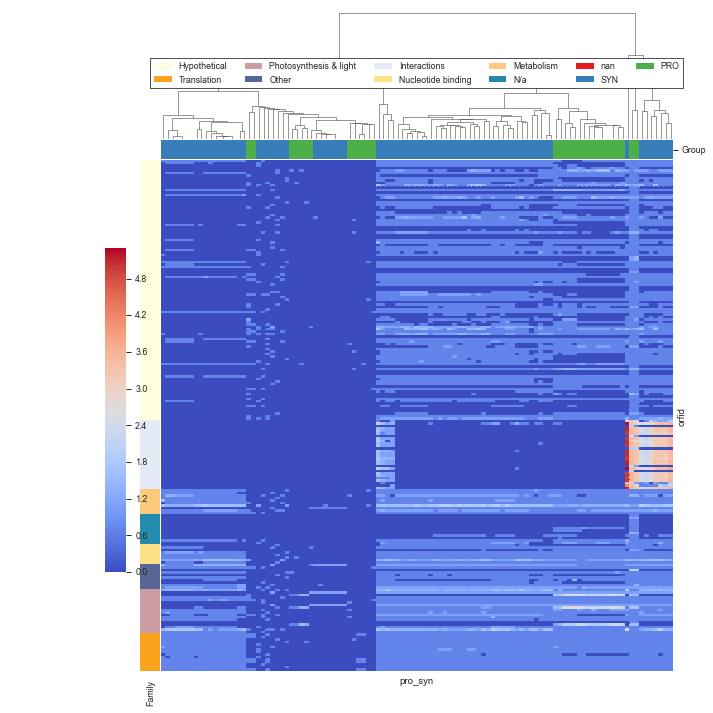

In [96]:
sns.set_context('paper')
orfids_sorted =found_sorf_df.loc[found_sorf_df.otype.isin(['Annotated', 'Intergenic'])].sort_values(by='Family')['orfid']
blastn_vs_pro_df['log_hsps'] = np.log(blastn_vs_pro_df['pro_syn_hsps']+1)
pivotdf = blastn_vs_pro_df.loc[
    blastn_vs_pro_df['query'].isin(orfids_sorted) & 
    ~blastn_vs_pro_df['pro_syn'].str.contains(' gene', case=False) &
    ~blastn_vs_pro_df['pro_syn'].str.contains(' plasmid', case=False)
].pivot_table(columns=['pro_syn'], index='query', values=['log_hsps'],
                                      fill_value=0, 
                                      ).droplevel(0,axis=1)
pivotdf = pivotdf.reindex(index=orfids_sorted).dropna(axis='index')


row_colors = row_col[pivotdf.index].map(row_pal)
col_colors = col_col[pivotdf.columns].map(col_pal)

g = sns.clustermap(data=pivotdf.loc[:, (pivotdf >= 1e-5).sum()>3], 
#g = sns.clustermap(data=pivotdf, 
                   cmap='coolwarm', row_colors=row_colors, col_colors=col_colors,
                   row_cluster=False,# row_linkage=False,
                  linewidths=0, xticklabels=False, yticklabels=False)



for label in row_col.unique():
    g.ax_col_dendrogram.bar(0, 0, color=row_pal[label],
                            label=label, linewidth=0)
for label in col_col.unique():
    g.ax_col_dendrogram.bar(0, 0, color=col_pal[label],
                            label=label, linewidth=0)
    
g.ax_col_dendrogram.legend(loc="center", ncol=6)
g.cax.set_position([.15, .2, .03, .45])


In [97]:
pivotdf.head()

pro_syn,Cyanobacterium Synechococcus 6301 DNA for ATP synthase subunits,Prochlorococcus marinus MED4 complete genome,Prochlorococcus marinus MIT9313 complete genome,Prochlorococcus marinus genomic region for RNase P RNA subunit and for Ribonuclease III,"Prochlorococcus marinus str. AS9601, complete genome",Prochlorococcus marinus str. MIT 9211 genome,"Prochlorococcus marinus str. MIT 9215, complete genome","Prochlorococcus marinus str. MIT 9301, complete genome","Prochlorococcus marinus str. MIT 9303, complete genome","Prochlorococcus marinus str. MIT 9312, complete genome",...,"Uncultured Synechococcus sp. clone SOMLIT-ASTAN-05292012_envPBS_SC31 PBS region, partial sequence","Uncultured Synechococcus sp. clone SOMLIT-ASTAN-05292012_envPBS_SC5 PBS region, partial sequence","Uncultured marine type-A Synechococcus 4O4, partial genome fragment","Uncultured marine type-A Synechococcus 5B2, partial genome fragment",Uncultured marine type-A Synechococcus GOM 3M9 rbcL-containing genomic sequence,Uncultured marine type-A Synechococcus GOM 3O12 rbcL-containing genomic sequence,Uncultured marine type-A Synechococcus GOM 3O6 rbcL-containing genomic sequence,Uncultured marine type-A Synechococcus GOM 4N23 rbcL-containing genomic sequence,Uncultured marine type-A Synechococcus GOM 4P21 rbcL-containing genomic sequence,Uncultured marine type-A Synechococcus GOM 5D20 rbcL-containing genomic sequence
orfid,,,,,,,,,,,,,,,,,,,,,
ORF21723_BX548175.1:1905095:1904856,0.000E+00,693.147E-03,693.147E-03,0.000E+00,693.147E-03,693.147E-03,693.147E-03,693.147E-03,693.147E-03,693.147E-03,...,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00
ORF29745_BX548175.1:775444:775223,0.000E+00,0.000E+00,693.147E-03,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,693.147E-03,0.000E+00,...,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00
ORF29615_BX548175.1:822436:822143,0.000E+00,0.000E+00,693.147E-03,0.000E+00,0.000E+00,693.147E-03,0.000E+00,0.000E+00,693.147E-03,0.000E+00,...,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00
ORF29263_BX548175.1:969070:968933,0.000E+00,693.147E-03,693.147E-03,0.000E+00,693.147E-03,693.147E-03,693.147E-03,0.000E+00,693.147E-03,1.099E+00,...,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00
ORF29134_BX548175.1:1021738:1021454,0.000E+00,1.099E+00,693.147E-03,0.000E+00,1.386E+00,693.147E-03,1.099E+00,1.386E+00,1.099E+00,693.147E-03,...,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00


In [98]:

(pivotdf >= 1e-5).sum().value_counts()


1      26
2      20
5      10
125    10
3       9
126     7
4       7
124     6
107     6
66      5
59      5
24      4
131     2
146     2
54      2
130     2
115     2
151     2
127     2
128     2
153     2
150     1
148     1
6       1
58      1
15      1
20      1
21      1
42      1
50      1
56      1
57      1
14      1
144     1
60      1
64      1
136     1
103     1
104     1
105     1
205     1
108     1
109     1
110     1
119     1
123     1
147     1
145     1
129     1
206     1
dtype: int64

In [99]:
pivotdf.shape

(206, 162)

In [100]:
pivotdf.index.str.contains('AK').sum()

53

KeyError: 'Hypothetical'

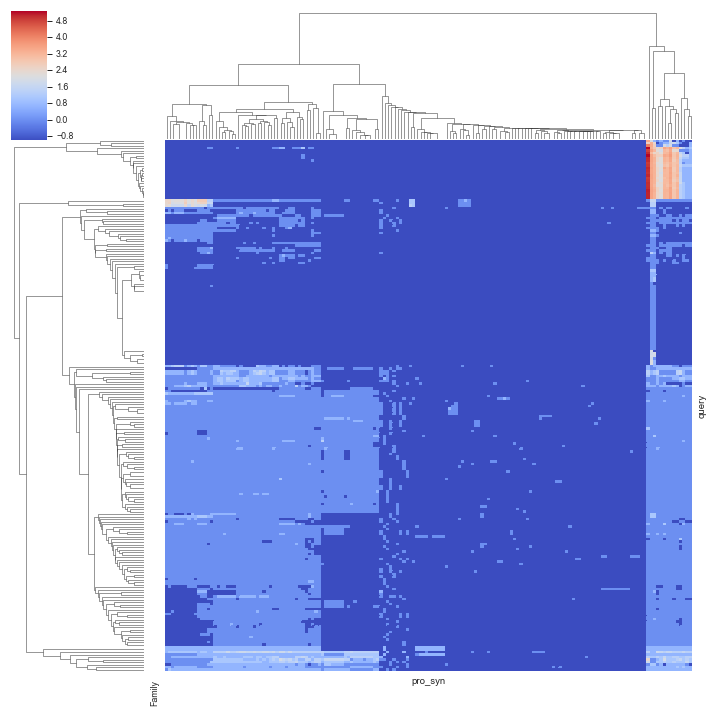

In [101]:
sns.set_context('paper')
blastn_vs_pro_df['log_hsps'] = np.log(blastn_vs_pro_df['pro_syn_hsps'])
pivotdf = blastn_vs_pro_df.loc[
    blastn_vs_pro_df['query'].isin(found_sorf_df['orfid']) & 
    ~blastn_vs_pro_df['pro_syn'].str.contains(' gene') &
    ~blastn_vs_pro_df['pro_syn'].str.contains(' plasmid')
].pivot_table(columns=['pro_syn'], index='query', values=['log_hsps'],
                                      fill_value=-1, 
                                      ).droplevel(0,axis=1)
row_colors = row_col[pivotdf.index].map(col_pal)

g = sns.clustermap(data=pivotdf, cmap='coolwarm', row_colors=row_colors,
                  linewidths=0, xticklabels=False, yticklabels=False)



for label in row_col.unique():
    g.ax_col_dendrogram.bar(0, 0, color=col_pal[label],
                            label=label, linewidth=0)
g.ax_col_dendrogram.legend(loc="center", ncol=6)
g.cax.set_position([.15, .2, .03, .45])


In [ ]:
pivotdf.loc[:, (pivotdf >= 0).sum()>5]

In [ ]:

g = sns.clustermap(data=pivotdf.loc[:, (pivotdf >= 0).sum()>5], 
                   cmap='coolwarm', row_colors=row_colors,
                  linewidths=0, xticklabels=False, yticklabels=False, #standard_scale=0
                  )



for label in row_col.unique():
    g.ax_col_dendrogram.bar(0, 0, color=col_pal[label],
                            label=label, linewidth=0)
g.ax_col_dendrogram.legend(loc="center", ncol=6)
g.cax.set_position([.15, .2, .03, .45])


In [ ]:
t = (pivotdf >= 0).sum()
t.nsmallest(20)

In [ ]:
t.index.str.contains('segment').sum()

In [ ]:
p = pivotdf.loc[found_sorf_df.loc[
    found_sorf_df.otype.isin(['Antisense', 'Out of Frame', 'Intergenic']), 'orfid']]
row_colors = row_col[p.index].map(col_pal)

g = sns.clustermap(data=p.loc[:, p.sum()>1], 
                   cmap='coolwarm', row_colors=row_col[p.index].map(col_pal), figsize=(15,15),
                  linewidths=0, #xticklabels=False, #yticklabels=False, #standard_scale=0
                  )



for label in row_col[p.index].unique():
    g.ax_col_dendrogram.bar(0, 0, color=col_pal[label],
                            label=label, linewidth=0)
g.ax_col_dendrogram.legend(loc="center", ncol=6)
g.cax.set_position([.15, .2, .03, .45])


In [ ]:
pivotdf.head()

In [ ]:
pivotdf.sum().sort_values().value_counts().sort_index()

In [ ]:
pivotdf.sum()>10

In [ ]:
pivotdf.droplevel(0,axis=1).index

In [ ]:
blastn_vs_pro_df.pro_syn_accession

In [ ]:
np.log(10)

In [ ]:
pivotdf.head()